# Import the data files

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('customers.csv')
claims = pd.read_csv('claims.csv')
policies = pd.read_csv('policies.csv')
segments = pd.read_csv('segments.csv')
vehicles = pd.read_csv('vehicles.csv')

Let's have a look at our data

In [3]:
policies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65471 entries, 0 to 65470
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POLICY_NUMBER      65471 non-null  int64  
 1   START_DATE         65471 non-null  object 
 2   END_DATE           65471 non-null  object 
 3   PREMIUM            65471 non-null  object 
 4   SALE_PREMIUM       65429 non-null  float64
 5   NUMBER_OF_DRIVERS  65384 non-null  float64
 6   PAYMENTMETHOD      21517 non-null  object 
 7   VEHICLE_ID         65471 non-null  object 
 8   CUSTOMER_ID        65471 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.5+ MB


In [4]:
len(policies.POLICY_NUMBER.unique())

50000

In [5]:
policies.sample(2)

,POLICY_NUMBER,START_DATE,END_DATE,PREMIUM,SALE_PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID
59355,6495859800,01/09/2020,31/08/2021,New Business,172.670425,1.0,NaN,vehicle81919,customer49945
14995,6495879650,16/09/2020,15/09/2021,New Business,145.063400,1.0,NaN,vehicle138587,customer39431


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65469 entries, 0 to 65468
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CUSTOMER_ID         65469 non-null  object 
 1   MARITALSTATUS       65441 non-null  object 
 2   DATE_OF_BIRTH       65349 non-null  object 
 3   GRANTED_NCD         65349 non-null  float64
 4   EMPLOYMENTTYPE      65426 non-null  object 
 5   VEHICLE_CLASSOFUSE  65469 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


In [7]:
customers.sample(2)

,CUSTOMER_ID,MARITALSTATUS,DATE_OF_BIRTH,GRANTED_NCD,EMPLOYMENTTYPE,VEHICLE_CLASSOFUSE
33145,customer97285,Married,1956-02-23,9.0,Employed,Social inc. Comm
24783,customer123536,Married,1982-06-28,6.0,Employed,Social only


In [8]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65469 entries, 0 to 65468
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VEHICLE_ID             65469 non-null  object 
 1   VEHICLE_VALUE          65440 non-null  float64
 2   VEHICLE_AGE            65344 non-null  float64
 3   VEHICLE_ANNUALMILEAGE  65349 non-null  float64
 4   VEHICLE_OWNEDMONTHS    65382 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.5+ MB


In [9]:
vehicles.sample(2)

,VEHICLE_ID,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS
10444,vehicle85677R,11999.880027,8.0,6019.443478,55.0
16127,vehicle46035,5011.945423,9.0,5009.150023,58.0


In [10]:
segments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50007 entries, 0 to 50006
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   POLICY_NUMBER   50007 non-null  int64  
 1   START_DATE      50007 non-null  object 
 2   SEGMENT_1_FLAG  49996 non-null  float64
 3   SEGMENT_2_FLAG  49926 non-null  float64
 4   SEGMENT_3_FLAG  49925 non-null  float64
 5   SEGMENT_4_FLAG  49931 non-null  float64
 6   SEGMENT_5_FLAG  49926 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [11]:
segments.sample(2)

,POLICY_NUMBER,START_DATE,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG
5449,6495710166,01/01/2021,1.0,0.0,0.0,0.0,0.0
48409,6495715605,11/01/2020,1.0,0.0,0.0,0.0,0.0


In [12]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6632 entries, 0 to 6631
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   POLICY_NUMBER     6632 non-null   float64
 1   DATE_OF_ACCIDENT  6618 non-null   object 
 2   CLAIM_ID          6632 non-null   object 
 3   INCURRED          6621 non-null   float64
dtypes: float64(2), object(2)
memory usage: 207.4+ KB


In [13]:
claims.sample(2)

,POLICY_NUMBER,DATE_OF_ACCIDENT,CLAIM_ID,INCURRED
4131,6.495718e+09,2020-11-21,claim328670,3.474518
5561,6.495820e+09,2021-03-28,claim76296,83.099451


The above shows that we have some null values in all the tables, for some columns. We will have to handle them individually. But before that, let's do a basic check on the data.

Once we have an idea about the size, shape and type of data, we should check if there are any policies, for which we don't have customer or vehicle data. Easiest way is to do an inner join and check for number of unique values.

In [14]:
merged_data = pd.merge(pd.merge(policies,customers,on='CUSTOMER_ID'),vehicles, on='VEHICLE_ID')

In [15]:
merged_data.shape

(65479, 18)

In [16]:
merged_data.columns

Index(['POLICY_NUMBER', 'START_DATE', 'END_DATE', 'PREMIUM', 'SALE_PREMIUM',
       'NUMBER_OF_DRIVERS', 'PAYMENTMETHOD', 'VEHICLE_ID', 'CUSTOMER_ID',
       'MARITALSTATUS', 'DATE_OF_BIRTH', 'GRANTED_NCD', 'EMPLOYMENTTYPE',
       'VEHICLE_CLASSOFUSE', 'VEHICLE_VALUE', 'VEHICLE_AGE',
       'VEHICLE_ANNUALMILEAGE', 'VEHICLE_OWNEDMONTHS'],
      dtype='object')

In [17]:
len(customers.CUSTOMER_ID.unique()), len(merged_data.CUSTOMER_ID.unique())

(65465, 65465)

In [18]:
len(policies.POLICY_NUMBER.unique()), len(merged_data.POLICY_NUMBER.unique())

(50000, 50000)

In [19]:
len(vehicles.VEHICLE_ID.unique()), len(merged_data.VEHICLE_ID.unique())

(65465, 65465)

Ok, so we don't have any missing data for policy-customer and policy-vehicle pairs, which is good.

# Handling Null Values

In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65479 entries, 0 to 65478
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POLICY_NUMBER          65479 non-null  int64  
 1   START_DATE             65479 non-null  object 
 2   END_DATE               65479 non-null  object 
 3   PREMIUM                65479 non-null  object 
 4   SALE_PREMIUM           65437 non-null  float64
 5   NUMBER_OF_DRIVERS      65392 non-null  float64
 6   PAYMENTMETHOD          21521 non-null  object 
 7   VEHICLE_ID             65479 non-null  object 
 8   CUSTOMER_ID            65479 non-null  object 
 9   MARITALSTATUS          65451 non-null  object 
 10  DATE_OF_BIRTH          65359 non-null  object 
 11  GRANTED_NCD            65359 non-null  float64
 12  EMPLOYMENTTYPE         65436 non-null  object 
 13  VEHICLE_CLASSOFUSE     65479 non-null  object 
 14  VEHICLE_VALUE          65450 non-null  float64
 15  VE

In [21]:
merged_data.isnull().sum()

POLICY_NUMBER                0
START_DATE                   0
END_DATE                     0
PREMIUM                      0
SALE_PREMIUM                42
NUMBER_OF_DRIVERS           87
PAYMENTMETHOD            43958
VEHICLE_ID                   0
CUSTOMER_ID                  0
MARITALSTATUS               28
DATE_OF_BIRTH              120
GRANTED_NCD                120
EMPLOYMENTTYPE              43
VEHICLE_CLASSOFUSE           0
VEHICLE_VALUE               29
VEHICLE_AGE                125
VEHICLE_ANNUALMILEAGE      120
VEHICLE_OWNEDMONTHS         87
dtype: int64

In [22]:
merged_data.PREMIUM.unique()

array(['New Business', 'Renewal', 'Cancelled'], dtype=object)

<AxesSubplot:xlabel='SALE_PREMIUM', ylabel='Count'>

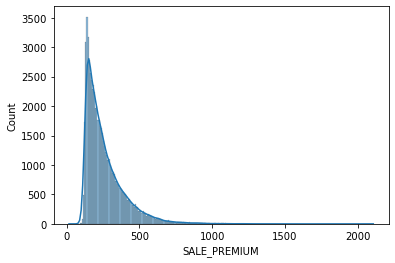

In [23]:
sns.histplot(merged_data.SALE_PREMIUM, kde=True)

<AxesSubplot:>

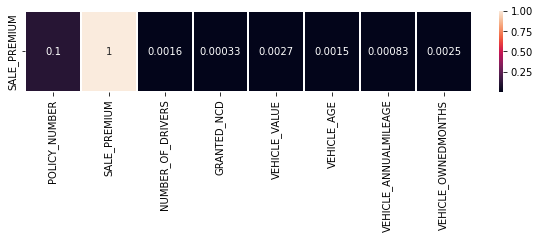

In [24]:
df_heatmap = pd.DataFrame(merged_data.corr()['SALE_PREMIUM'].abs())
f,ax = plt.subplots(figsize=(10,1.5),facecolor='white')
sns.heatmap(df_heatmap.transpose(), annot = True, linewidths=1.5, cmap='rocket')

Sale Premium: this is a numerical value, and doesn't really depend much on others. But this is a right skewed data distribution. So median would be a better metric than mean. 

In [25]:
_,_,_,_,_, sale_pre_median,*_ = merged_data.describe().SALE_PREMIUM
merged_data.SALE_PREMIUM = merged_data.SALE_PREMIUM.fillna(sale_pre_median)

In [26]:
merged_data.NUMBER_OF_DRIVERS.describe()

count    65392.000000
mean         1.603117
std          0.607018
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: NUMBER_OF_DRIVERS, dtype: float64

<AxesSubplot:xlabel='NUMBER_OF_DRIVERS', ylabel='Count'>

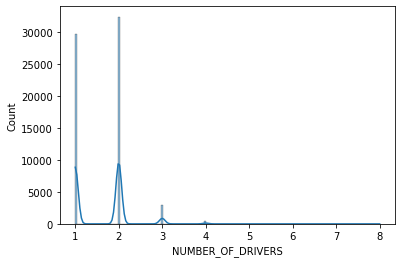

In [27]:
sns.histplot(merged_data.NUMBER_OF_DRIVERS, kde=True)

<AxesSubplot:>

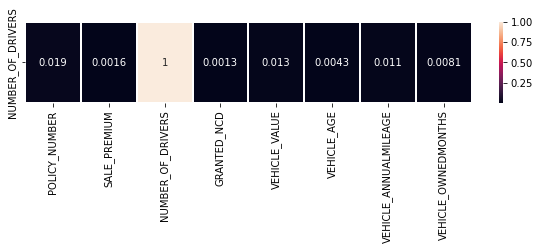

In [28]:
df_heatmap = pd.DataFrame(merged_data.corr()['NUMBER_OF_DRIVERS'].abs())
f,ax = plt.subplots(figsize=(10,1.5),facecolor='white')
sns.heatmap(df_heatmap.transpose(), annot = True, linewidths=1.5, cmap='rocket')

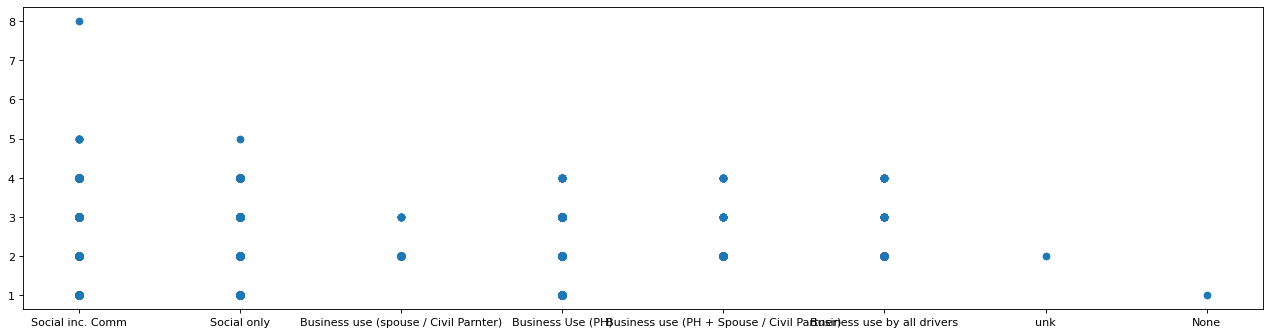

In [29]:
plt.figure(figsize=(20, 5), dpi=80)
plt.scatter(merged_data.VEHICLE_CLASSOFUSE, merged_data.NUMBER_OF_DRIVERS)

In [30]:
_,_,_,_,_, drivers_median,*_ = merged_data.describe().NUMBER_OF_DRIVERS
merged_data.NUMBER_OF_DRIVERS = merged_data.NUMBER_OF_DRIVERS.fillna(drivers_median)

In [31]:
merged_data.PAYMENTMETHOD.unique()

array([nan, 'Monthly', 'None', 'unk', 'Unknown'], dtype=object)

In [32]:
max_premium = merged_data[merged_data.PAYMENTMETHOD == 'Monthly']['SALE_PREMIUM'].max()
merged_data[merged_data.SALE_PREMIUM > max_premium]

,POLICY_NUMBER,START_DATE,END_DATE,PREMIUM,SALE_PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID,MARITALSTATUS,DATE_OF_BIRTH,GRANTED_NCD,EMPLOYMENTTYPE,VEHICLE_CLASSOFUSE,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS
48057,6495677673,19/10/2019,18/10/2020,New Business,2106.308634,1.0,NaN,vehicle130857,customer86920,Single,1994-06-08,0.0,Employed,Social inc. Comm,386.609746,14.0,3986.614163,3.0
52866,6495677673,19/10/2020 00:00,18/10/2021 00:00,Renewal,2104.558826,1.0,NaN,vehicle130857R,customer86920R,Single,1994-06-08,1.0,Employed,Social inc. Comm,387.802662,15.0,4007.114642,15.0


In [33]:
merged_data['PAYMENTMETHOD'] = 'Monthly'
merged_data.PAYMENTMETHOD.unique()

array(['Monthly'], dtype=object)

<AxesSubplot:xlabel='MARITALSTATUS', ylabel='count'>

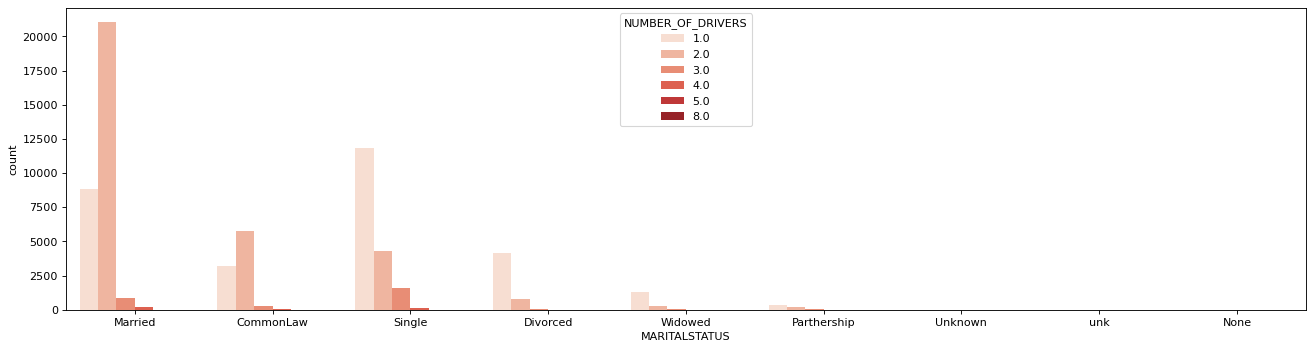

In [34]:
non_null_df = merged_data[merged_data[['MARITALSTATUS','NUMBER_OF_DRIVERS']].notna().all(axis=1)]
plt.figure(figsize=(20, 5), dpi=80)
sns.countplot(x=non_null_df.MARITALSTATUS, hue=non_null_df.NUMBER_OF_DRIVERS,  palette="Reds")
#splot.set(yscale='log')

In [35]:
merged_data.MARITALSTATUS.unique()

array(['Married', 'CommonLaw', 'Single', 'Divorced', 'Widowed',
       'Parthership', 'Unknown', nan, 'unk', 'None'], dtype=object)

In [36]:
import math
def update_marital_status(ms, drivers):
    if ms in  ['Unknown', 'unk', 'None'] or ms != ms:
        return 'Married' if drivers == 2 else 'Single'
    else:
        return ms
    
merged_data['MARITALSTATUS'] = merged_data.apply(lambda x: update_marital_status(x['MARITALSTATUS'], x['NUMBER_OF_DRIVERS']), axis=1)


In [37]:
merged_data.MARITALSTATUS.unique()

array(['Married', 'CommonLaw', 'Single', 'Divorced', 'Widowed',
       'Parthership'], dtype=object)

In [38]:
merged_data.GRANTED_NCD.describe()

count    6.535900e+04
mean     6.190999e+02
std      7.822886e+04
min     -9.990000e+02
25%      5.000000e+00
50%      9.000000e+00
75%      9.000000e+00
max      1.000000e+07
Name: GRANTED_NCD, dtype: float64

In [39]:
merged_data.GRANTED_NCD = merged_data.GRANTED_NCD.apply(lambda x: 0 if x<0 else x)
merged_data.GRANTED_NCD = merged_data.GRANTED_NCD.fillna(0)

In [40]:
merged_data.EMPLOYMENTTYPE.unique()

array(['Employed', 'Retired', 'Self Employed', 'Unemployed',
       'Household Duties', 'In Full Or Part Time Education',
       'Not employed due to disability', 'Independent Means', nan,
       'Unknown', 'Voluntary Work', 'None', 'unk'], dtype=object)

In [41]:
merged_data.EMPLOYMENTTYPE.value_counts()

Employed                          47197
Retired                            8409
Self Employed                      5299
Household Duties                   2128
In Full Or Part Time Education     1036
Unemployed                          834
Not employed due to disability      457
Independent Means                    56
Voluntary Work                       12
unk                                   4
Unknown                               2
None                                  2
Name: EMPLOYMENTTYPE, dtype: int64

In [42]:
merged_data.EMPLOYMENTTYPE=merged_data.EMPLOYMENTTYPE.fillna('Employed')
merged_data.EMPLOYMENTTYPE.replace({'unk': 'Unemployed', 'Unknown': 'Unemployed', 'None': 'Unemployed'}, inplace = True)
merged_data.EMPLOYMENTTYPE.unique()

array(['Employed', 'Retired', 'Self Employed', 'Unemployed',
       'Household Duties', 'In Full Or Part Time Education',
       'Not employed due to disability', 'Independent Means',
       'Voluntary Work'], dtype=object)

Handle null values in Date of Birth

In [43]:
merged_data.DATE_OF_BIRTH = pd.to_datetime(merged_data.DATE_OF_BIRTH)
from datetime import date
def calculate_age(dob):
    today = date.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age
                                         
merged_data['Age'] = merged_data['DATE_OF_BIRTH'].apply(calculate_age) 
merged_data['Age'].head()

0    56.0
1    41.0
2    47.0
3    42.0
4    24.0
Name: Age, dtype: float64

In [44]:
merged_data['Age'] = merged_data.groupby(['EMPLOYMENTTYPE'])['Age'].apply(lambda x: x.fillna(x.median()))
merged_data = merged_data.drop(['DATE_OF_BIRTH'], axis = 'columns' )

In [45]:
merged_data['Age'].describe()

count    65479.000000
mean        47.348638
std         14.677956
min         17.000000
25%         36.000000
50%         47.000000
75%         58.000000
max         88.000000
Name: Age, dtype: float64

Handle null value of VEHICLE_VALUE

<AxesSubplot:>

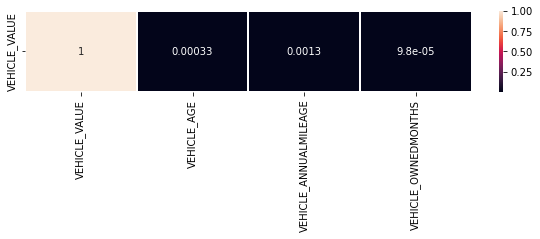

In [46]:
df_heatmap = pd.DataFrame(vehicles.corr()['VEHICLE_VALUE'].abs())
f,ax = plt.subplots(figsize=(10,1.5),facecolor='white')
sns.heatmap(df_heatmap.transpose(), annot = True, linewidths=1.5, cmap='rocket')

<AxesSubplot:xlabel='VEHICLE_VALUE', ylabel='Count'>

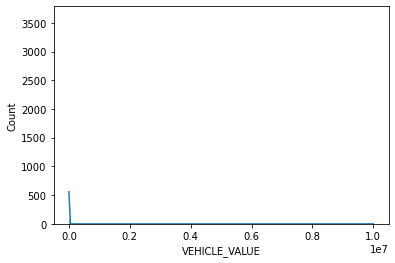

In [47]:
sns.histplot(merged_data['VEHICLE_VALUE'], kde= True)

In [48]:
_,_,_,_,_, vehicle_value_median,*_ = merged_data.describe().VEHICLE_VALUE
merged_data.VEHICLE_VALUE = merged_data.VEHICLE_VALUE.fillna(vehicle_value_median)

In [49]:
vehicles[vehicles.VEHICLE_AGE.isnull() & vehicles.VEHICLE_OWNEDMONTHS.isnull()]

,VEHICLE_ID,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS


As there are no rows with both VEHICLE_AGE and VEHICLE_OWNEDMONTHS as null, and these columns might sound redundant to some people, we can safely assume if someone has left one of the columns unfilled this could be the same as other one

In [50]:
merged_data.VEHICLE_AGE = merged_data.VEHICLE_AGE.fillna(merged_data.VEHICLE_OWNEDMONTHS/12)

In [51]:
merged_data.VEHICLE_OWNEDMONTHS = merged_data.VEHICLE_OWNEDMONTHS.fillna(merged_data.VEHICLE_AGE*12)

In [52]:
merged_data.VEHICLE_CLASSOFUSE.value_counts()

Social inc. Comm                              33689
Social only                                   25281
Business Use (PH)                              5416
Business use (PH + Spouse / Civil Partner)      774
Business use by all drivers                     193
Business use (spouse / Civil Parnter)           124
unk                                               1
None                                              1
Name: VEHICLE_CLASSOFUSE, dtype: int64

In [53]:
merged_data.VEHICLE_CLASSOFUSE.replace({'unk': 'Social inc. Comm','None': 'Social inc. Comm'}, inplace = True)
merged_data['VEHICLE_CLASSOFUSE'].unique()

array(['Social inc. Comm', 'Social only',
       'Business use (spouse / Civil Parnter)', 'Business Use (PH)',
       'Business use (PH + Spouse / Civil Partner)',
       'Business use by all drivers'], dtype=object)

In [54]:
merged_data.VEHICLE_ANNUALMILEAGE.describe()

count    6.535900e+04
mean     7.222394e+03
std      3.923968e+04
min     -9.999000e+03
25%      4.985224e+03
50%      6.978196e+03
75%      9.974371e+03
max      9.999999e+06
Name: VEHICLE_ANNUALMILEAGE, dtype: float64

In [55]:
 merged_data.groupby(['VEHICLE_CLASSOFUSE'])['VEHICLE_ANNUALMILEAGE'].median()

VEHICLE_CLASSOFUSE
Business Use (PH)                             9299.856615
Business use (PH + Spouse / Civil Partner)    9017.385377
Business use (spouse / Civil Parnter)         8501.264702
Business use by all drivers                   9004.619311
Social inc. Comm                              7960.286905
Social only                                   5016.613042
Name: VEHICLE_ANNUALMILEAGE, dtype: float64

In [56]:
merged_data['VEHICLE_ANNUALMILEAGE'] = merged_data.groupby(['VEHICLE_CLASSOFUSE'])['VEHICLE_ANNUALMILEAGE'].apply(lambda x: x.fillna(x.median()))

In [57]:
segments = segments.fillna(0)

In [58]:
claims.isnull().sum()

POLICY_NUMBER        0
DATE_OF_ACCIDENT    14
CLAIM_ID             0
INCURRED            11
dtype: int64

In [59]:
claims.DATE_OF_ACCIDENT=claims.DATE_OF_ACCIDENT.ffill()

In [60]:
claims.DATE_OF_ACCIDENT.dtype

dtype('O')

In [61]:
claims.describe()

,POLICY_NUMBER,INCURRED
count,6.632000e+03,6621.000000
mean,6.495654e+09,2063.644206
std,1.683288e+05,6506.790559
min,6.495204e+09,-138.923543
25%,6.495518e+09,8.720393
50%,6.495663e+09,96.274142
75%,6.495794e+09,1982.251724
max,6.496013e+09,274467.264443


<AxesSubplot:xlabel='INCURRED', ylabel='Count'>

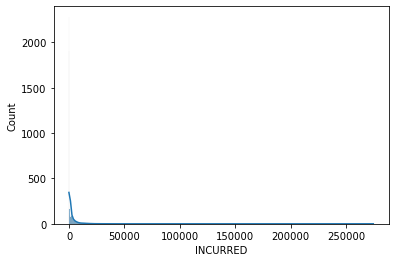

In [62]:
sns.histplot(claims['INCURRED'], kde= True)

In [63]:
_,_,_,_,_, incurred_median,*_ = claims['INCURRED'].describe()
claims['INCURRED'] = claims['INCURRED'].fillna(incurred_median)

In [64]:
claims.isnull().sum(), segments.isnull().sum(), merged_data.isnull().sum()

(POLICY_NUMBER       0
 DATE_OF_ACCIDENT    0
 CLAIM_ID            0
 INCURRED            0
 dtype: int64,
 POLICY_NUMBER     0
 START_DATE        0
 SEGMENT_1_FLAG    0
 SEGMENT_2_FLAG    0
 SEGMENT_3_FLAG    0
 SEGMENT_4_FLAG    0
 SEGMENT_5_FLAG    0
 dtype: int64,
 POLICY_NUMBER            0
 START_DATE               0
 END_DATE                 0
 PREMIUM                  0
 SALE_PREMIUM             0
 NUMBER_OF_DRIVERS        0
 PAYMENTMETHOD            0
 VEHICLE_ID               0
 CUSTOMER_ID              0
 MARITALSTATUS            0
 GRANTED_NCD              0
 EMPLOYMENTTYPE           0
 VEHICLE_CLASSOFUSE       0
 VEHICLE_VALUE            0
 VEHICLE_AGE              0
 VEHICLE_ANNUALMILEAGE    0
 VEHICLE_OWNEDMONTHS      0
 Age                      0
 dtype: int64)

In [65]:
merged_data.shape

(65479, 18)

# Outlier Removal

In [66]:
cleaned_data = merged_data
cleaned_data.shape

(65479, 18)

In [67]:
def get_mean_std(col_name):
    _, mean, std, *_ = cleaned_data[col_name].describe()
    return mean, std

def get_z_score(value, mean, std):
    return (value - mean)/std

In [68]:
mean, std = get_mean_std('GRANTED_NCD')
cleaned_data['z_score_ncd'] = cleaned_data['GRANTED_NCD'].apply(lambda x: get_z_score(x, mean, std))
cleaned_data = cleaned_data[abs(cleaned_data.z_score_ncd) < 3]

<AxesSubplot:xlabel='GRANTED_NCD', ylabel='Count'>

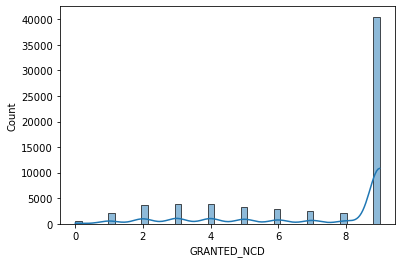

In [69]:
sns.histplot(cleaned_data['GRANTED_NCD'], kde=True)

In [70]:
cleaned_data['SALE_PREMIUM'].describe()

count    65475.000000
mean       261.747621
std        139.641817
min         15.504902
25%        163.322708
50%        219.968773
75%        315.815933
max       2106.308634
Name: SALE_PREMIUM, dtype: float64

In [71]:
mean, std = get_mean_std('SALE_PREMIUM')
cleaned_data['z_score_sp'] = cleaned_data['SALE_PREMIUM'].apply(lambda x: get_z_score(x, mean, std))
cleaned_data = cleaned_data[abs(cleaned_data.z_score_sp) < 3]

/var/folders/hc/mvkkfvpx11l4pqhrwb8qmzbm0000gn/T/ipykernel_766/3625208614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['z_score_sp'] = cleaned_data['SALE_PREMIUM'].apply(lambda x: get_z_score(x, mean, std))


<AxesSubplot:xlabel='SALE_PREMIUM', ylabel='Count'>

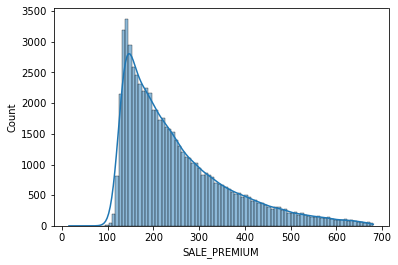

In [72]:
sns.histplot(cleaned_data['SALE_PREMIUM'], kde=True)

In [73]:
ll, ul = cleaned_data.NUMBER_OF_DRIVERS.quantile([0.001, 0.999])
outliers = cleaned_data[(cleaned_data.NUMBER_OF_DRIVERS>ul) | (cleaned_data.NUMBER_OF_DRIVERS<ll)]
outliers.shape

(7, 20)

In [74]:
cleaned_data = cleaned_data[(cleaned_data['NUMBER_OF_DRIVERS'] <= ul) & (cleaned_data['NUMBER_OF_DRIVERS'] >= ll)]

In [75]:
cleaned_data.VEHICLE_VALUE.describe()

count    6.439100e+04
mean     5.983260e+03
std      8.821640e+04
min      0.000000e+00
25%      1.948552e+03
50%      3.844682e+03
75%      6.893705e+03
max      1.000001e+07
Name: VEHICLE_VALUE, dtype: float64

In [76]:
ll, ul = cleaned_data.VEHICLE_VALUE.quantile([0.001, 0.999])
outliers = cleaned_data[(cleaned_data.VEHICLE_VALUE>ul) | (cleaned_data.VEHICLE_VALUE<ll)]
outliers.shape

(130, 20)

In [77]:
cleaned_data = cleaned_data[(cleaned_data['VEHICLE_VALUE'] <= ul) & (cleaned_data['VEHICLE_VALUE'] >= ll)]

In [78]:
cleaned_data.VEHICLE_AGE.describe()

count    6.426100e+04
mean     9.432163e+02
std      9.662391e+04
min     -9.999000e+03
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      1.000000e+07
Name: VEHICLE_AGE, dtype: float64

In [79]:
ll, ul = cleaned_data.VEHICLE_AGE.quantile([0.001, 0.999])
outliers = cleaned_data[(cleaned_data.VEHICLE_AGE>ul) | (cleaned_data.VEHICLE_AGE<ll)]
outliers.shape

(58, 20)

In [80]:
cleaned_data = cleaned_data[(cleaned_data['VEHICLE_AGE'] <= ul) & (cleaned_data['VEHICLE_AGE'] >= ll)]

In [81]:
cleaned_data.VEHICLE_AGE.describe()

count    64203.000000
mean         9.853589
std          4.312880
min          0.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         26.000000
Name: VEHICLE_AGE, dtype: float64

In [82]:
cleaned_data.VEHICLE_ANNUALMILEAGE.describe()

count    6.420300e+04
mean     7.225234e+03
std      3.958793e+04
min     -9.999000e+03
25%      4.985372e+03
50%      6.978721e+03
75%      9.974048e+03
max      9.999999e+06
Name: VEHICLE_ANNUALMILEAGE, dtype: float64

In [83]:
ll, ul = cleaned_data.VEHICLE_ANNUALMILEAGE.quantile([0.001, 0.999])
outliers = cleaned_data[(cleaned_data.VEHICLE_ANNUALMILEAGE>ul) | (cleaned_data.VEHICLE_ANNUALMILEAGE<ll)]
outliers.shape

(130, 20)

In [84]:
cleaned_data = cleaned_data[(cleaned_data['VEHICLE_ANNUALMILEAGE'] <= ul) & (cleaned_data['VEHICLE_ANNUALMILEAGE'] >= ll)]

In [85]:
cleaned_data.VEHICLE_ANNUALMILEAGE.describe()

count    64073.000000
mean      7048.314269
std       3285.707831
min        496.127325
25%       4985.615602
50%       6978.721286
75%       9973.379381
max      25024.687350
Name: VEHICLE_ANNUALMILEAGE, dtype: float64

In [86]:
cleaned_data.VEHICLE_OWNEDMONTHS.describe()

count    6.407300e+04
mean     5.190353e+02
std      6.842496e+04
min     -9.999000e+03
25%      2.500000e+01
50%      4.300000e+01
75%      6.900000e+01
max      1.000001e+07
Name: VEHICLE_OWNEDMONTHS, dtype: float64

In [87]:
ll, ul = cleaned_data.VEHICLE_OWNEDMONTHS.quantile([0.001, 0.999])
outliers = cleaned_data[(cleaned_data.VEHICLE_OWNEDMONTHS>ul) | (cleaned_data.VEHICLE_OWNEDMONTHS<ll)]
outliers.shape

(73, 20)

In [88]:
cleaned_data = cleaned_data[(cleaned_data['VEHICLE_OWNEDMONTHS'] <= ul) & (cleaned_data['VEHICLE_OWNEDMONTHS'] >= ll)]

In [89]:
cleaned_data.VEHICLE_OWNEDMONTHS.describe()

count    64000.000000
mean        51.184578
std         36.113532
min          0.000000
25%         25.000000
50%         43.000000
75%         69.000000
max        229.000000
Name: VEHICLE_OWNEDMONTHS, dtype: float64

In [90]:
cleaned_data = cleaned_data.drop(['z_score_ncd', 'z_score_sp'], axis=1)


In [91]:
from datetime import datetime
from datetime import timedelta

def update_date(old_date, form):
    if old_date.endswith('00:00'):
        old_date = old_date.split(' ')[0]
        date = datetime.strptime(old_date, form)
        date = date - timedelta(days=365)
        return date
    else:
        date = datetime.strptime(old_date, form)
        return date
    
cleaned_data['END_DATE'] = cleaned_data['END_DATE'].apply(lambda x: update_date(x, '%d/%m/%Y'))
cleaned_data['START_DATE'] = cleaned_data['START_DATE'].apply(lambda x: update_date(x, '%d/%m/%Y'))
claims['DATE_OF_ACCIDENT'] = claims['DATE_OF_ACCIDENT'].apply(lambda x: update_date(x, '%Y-%m-%d'))

In [92]:
new_data = pd.merge(pd.merge(cleaned_data,claims,how='left',on='POLICY_NUMBER'),segments, how='left', on='POLICY_NUMBER')


In [93]:
claimed_data = pd.merge(cleaned_data,claims,how='inner',on='POLICY_NUMBER')
claimed_data['GAP_CLAIMED_START'] = claimed_data.apply(lambda x: (x.DATE_OF_ACCIDENT - x.START_DATE).days if x.DATE_OF_ACCIDENT == x.DATE_OF_ACCIDENT else x.DATE_OF_ACCIDENT, axis=1)
claimed_data['GAP_CLAIMED_END'] = claimed_data.apply(lambda x: (x.END_DATE - x.DATE_OF_ACCIDENT).days if x.DATE_OF_ACCIDENT == x.DATE_OF_ACCIDENT else x.DATE_OF_ACCIDENT, axis=1)

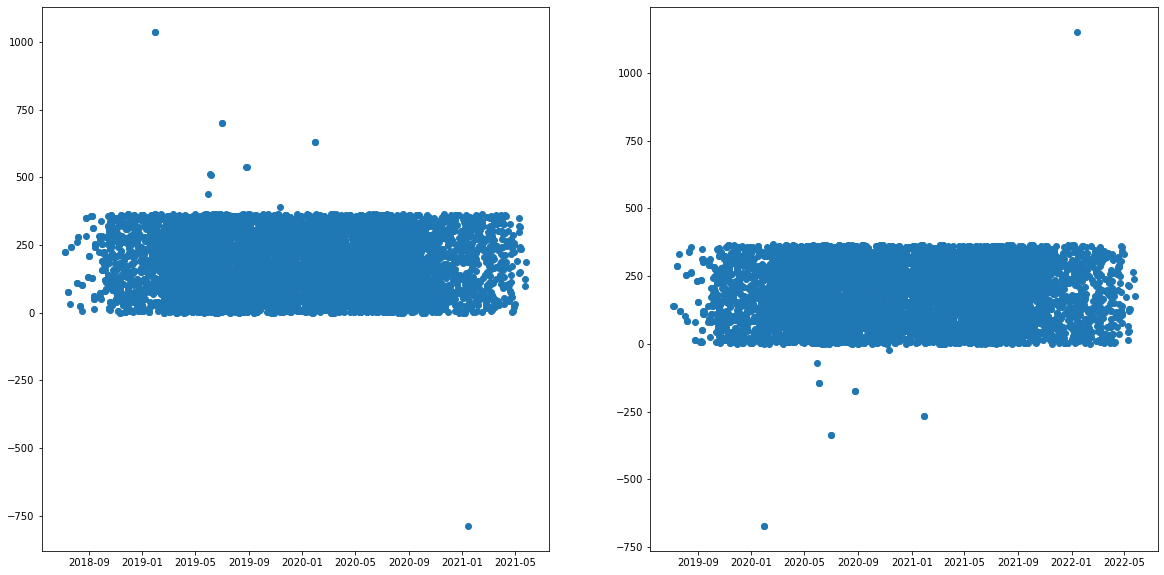

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.plot_date(claimed_data.START_DATE, claimed_data['GAP_CLAIMED_START'])
ax2.plot_date(claimed_data.END_DATE, claimed_data['GAP_CLAIMED_END'])


In [95]:
new_data[(new_data['END_DATE'] - new_data['START_DATE_x']) > timedelta(days=365)]

,POLICY_NUMBER,START_DATE_x,END_DATE,PREMIUM,SALE_PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID,MARITALSTATUS,...,Age,DATE_OF_ACCIDENT,CLAIM_ID,INCURRED,START_DATE_y,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG


In [96]:
new_data['GAP_CLAIMED_START'] = new_data.apply(lambda x: (x.DATE_OF_ACCIDENT - x.START_DATE_x).days if x.DATE_OF_ACCIDENT == x.DATE_OF_ACCIDENT else x.DATE_OF_ACCIDENT, axis=1)
new_data['GAP_CLAIMED_END'] = new_data.apply(lambda x: (x.END_DATE - x.DATE_OF_ACCIDENT).days if x.DATE_OF_ACCIDENT == x.DATE_OF_ACCIDENT else x.DATE_OF_ACCIDENT, axis=1)

In [97]:
new_data[new_data['GAP_CLAIMED_START'] > 365]

,POLICY_NUMBER,START_DATE_x,END_DATE,PREMIUM,SALE_PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID,MARITALSTATUS,...,CLAIM_ID,INCURRED,START_DATE_y,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG,GAP_CLAIMED_START,GAP_CLAIMED_END
9578,6495731555,2020-01-31,2021-01-29,Renewal,271.745167,1.0,Monthly,vehicle2098R,customer17005R,Widowed,...,claim168648,78.599673,30/01/2020,1.0,0.0,0.0,0.0,0.0,629,-265
13448,6495587081,2019-07-01,2020-06-30,New Business,466.841258,1.0,Monthly,vehicle86852,customer29403,CommonLaw,...,claim282878,0.000000,01/07/2019,1.0,0.0,0.0,0.0,0.0,701,-336
27408,6495587081,2019-07-02,2020-06-30,Renewal,468.641132,1.0,Monthly,vehicle86852R,customer29403R,CommonLaw,...,claim282878,0.000000,01/07/2019,1.0,0.0,0.0,0.0,0.0,700,-336
31164,6495635188,2019-08-26,2020-08-25,New Business,182.210210,1.0,Monthly,vehicle7915,customer3401,CommonLaw,...,claim329794,87.379316,26/08/2019,1.0,0.0,0.0,0.0,0.0,539,-174
31364,6495731555,2020-01-30,2021-01-29,New Business,271.552812,1.0,Monthly,vehicle2098,customer17005,Widowed,...,claim168648,78.599673,30/01/2020,1.0,0.0,0.0,0.0,0.0,630,-265
36150,6495420009,2019-01-30,2020-01-29,New Business,255.162856,1.0,Monthly,vehicle38224,customer95899,CommonLaw,...,claim269633,0.000000,30/01/2019,1.0,0.0,0.0,1.0,0.0,1037,-673
40848,6495547134,2019-05-31,2020-05-30,New Business,192.379454,1.0,Monthly,vehicle18032,customer77329,Divorced,...,claim85431,0.000000,31/05/2019,1.0,0.0,0.0,0.0,0.0,437,-72
44118,6495635188,2019-08-27,2020-08-25,Renewal,179.352170,1.0,Monthly,vehicle7915R,customer3401R,CommonLaw,...,claim329794,87.379316,26/08/2019,1.0,0.0,0.0,0.0,0.0,538,-174
45933,6495704299,2019-11-11,2020-11-10,New Business,456.605929,1.0,Monthly,vehicle82644,customer129176,Divorced,...,claim318604,1056.279418,11/11/2019,1.0,0.0,0.0,0.0,0.0,389,-24
50225,6495420009,2019-01-30,2020-01-30,Renewal,257.284743,1.0,Monthly,vehicle38224R,customer95899R,CommonLaw,...,claim269633,0.000000,30/01/2019,1.0,0.0,0.0,1.0,0.0,1037,-672


In [98]:
new_data = new_data[(new_data.GAP_CLAIMED_START != new_data.GAP_CLAIMED_START) | ((new_data.GAP_CLAIMED_START >= 0) & (new_data.GAP_CLAIMED_START <= 365))]
new_data = new_data[(new_data.GAP_CLAIMED_END != new_data.GAP_CLAIMED_END) | ((new_data.GAP_CLAIMED_END >= 0) & (new_data.GAP_CLAIMED_END <= 365) )]

In [99]:
new_data[new_data['GAP_CLAIMED_START'] > 365]

,POLICY_NUMBER,START_DATE_x,END_DATE,PREMIUM,SALE_PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID,MARITALSTATUS,...,CLAIM_ID,INCURRED,START_DATE_y,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG,GAP_CLAIMED_START,GAP_CLAIMED_END


In [100]:
new_data[new_data['START_DATE_x'] > new_data['END_DATE']]

,POLICY_NUMBER,START_DATE_x,END_DATE,PREMIUM,SALE_PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID,MARITALSTATUS,...,CLAIM_ID,INCURRED,START_DATE_y,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG,GAP_CLAIMED_START,GAP_CLAIMED_END


# Exploratory Data Analysis

In [101]:
data = new_data

In [102]:
data.shape

(64040, 29)

In [103]:
data.columns

Index(['POLICY_NUMBER', 'START_DATE_x', 'END_DATE', 'PREMIUM', 'SALE_PREMIUM',
       'NUMBER_OF_DRIVERS', 'PAYMENTMETHOD', 'VEHICLE_ID', 'CUSTOMER_ID',
       'MARITALSTATUS', 'GRANTED_NCD', 'EMPLOYMENTTYPE', 'VEHICLE_CLASSOFUSE',
       'VEHICLE_VALUE', 'VEHICLE_AGE', 'VEHICLE_ANNUALMILEAGE',
       'VEHICLE_OWNEDMONTHS', 'Age', 'DATE_OF_ACCIDENT', 'CLAIM_ID',
       'INCURRED', 'START_DATE_y', 'SEGMENT_1_FLAG', 'SEGMENT_2_FLAG',
       'SEGMENT_3_FLAG', 'SEGMENT_4_FLAG', 'SEGMENT_5_FLAG',
       'GAP_CLAIMED_START', 'GAP_CLAIMED_END'],
      dtype='object')

In [104]:
data.sample(5)

,POLICY_NUMBER,START_DATE_x,END_DATE,PREMIUM,SALE_PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID,MARITALSTATUS,...,CLAIM_ID,INCURRED,START_DATE_y,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG,GAP_CLAIMED_START,GAP_CLAIMED_END
9953,6495722951,2020-01-08,2021-01-07,New Business,273.419796,1.0,Monthly,vehicle59248,customer109426,Divorced,...,NaN,NaN,08/01/2020,1.0,0.0,0.0,0.0,0.0,NaT,NaT
54683,6495695793,2019-11-12,2020-11-10,Renewal,219.968773,1.0,Monthly,vehicle15180R,customer18489R,Divorced,...,NaN,NaN,11/11/2019,1.0,0.0,0.0,0.0,0.0,NaT,NaT
33409,6495577069,2019-07-23,2020-07-21,Renewal,484.641162,1.0,Monthly,vehicle10523R,customer29898R,Married,...,NaN,NaN,22/07/2019,1.0,0.0,0.0,0.0,0.0,NaT,NaT
9498,6495502833,2019-04-07,2020-04-06,New Business,267.399246,2.0,Monthly,vehicle18870,customer79220,Married,...,claim59670,4.239655,07/04/2019,1.0,0.0,0.0,0.0,0.0,311,54
4112,6496012903,2021-05-28,2022-05-27,Cancelled,275.804628,1.0,Monthly,vehicle110595,customer47279,Divorced,...,NaN,NaN,28/05/2021,0.0,0.0,0.0,1.0,0.0,NaT,NaT


In [105]:
data.CLAIM_ID.isnull().sum()

54796

In [106]:
data['CLAIMED'] = data.CLAIM_ID.apply( lambda x : 1 if x==x else 0)

In [107]:
data['POLICIES'] = 1

In [108]:
data['START_DATE'] = data['START_DATE_x']

In [109]:
data = data.drop(['POLICY_NUMBER', 'START_DATE_x', 'START_DATE_y', 'VEHICLE_ID', 'CUSTOMER_ID' ], axis=1)

# Univariate Analysis 

In [110]:
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(include=object)

In [111]:
num_data = num_data.drop(['CLAIMED', 'POLICIES'], axis=1)

In [112]:
num_data.skew()

SALE_PREMIUM              1.250235
NUMBER_OF_DRIVERS         0.619159
GRANTED_NCD              -1.154800
VEHICLE_VALUE             2.243608
VEHICLE_AGE               0.185040
VEHICLE_ANNUALMILEAGE     0.768882
VEHICLE_OWNEDMONTHS       1.260204
Age                       0.194603
INCURRED                 20.930778
SEGMENT_1_FLAG           -0.877604
SEGMENT_2_FLAG           18.229276
SEGMENT_3_FLAG            5.307280
SEGMENT_4_FLAG            1.989215
SEGMENT_5_FLAG            3.238364
dtype: float64

In [113]:
num_data.describe()

,SALE_PREMIUM,NUMBER_OF_DRIVERS,GRANTED_NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,Age,INCURRED,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG
count,64040.000000,64040.000000,64040.000000,64040.000000,64040.000000,64040.000000,64040.000000,64040.000000,9244.000000,64040.000000,64040.000000,64040.000000,64040.000000,64040.000000
mean,251.854279,1.605418,7.241318,5168.259042,9.841408,7051.494649,51.185899,47.597619,2024.656789,0.700906,0.002983,0.032121,0.147408,0.074594
std,115.393339,0.603714,2.625833,4774.555221,4.298545,3284.695149,36.127519,14.565531,6911.417271,0.457865,0.054531,0.176322,0.354515,0.262737
min,15.504902,1.000000,0.000000,148.355921,0.000000,496.127325,0.000000,17.000000,-138.923543,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162.444517,1.000000,5.000000,1958.226120,7.000000,4985.771891,25.000000,36.000000,10.235642,0.000000,0.000000,0.000000,0.000000,0.000000
50%,217.929890,2.000000,9.000000,3846.304769,10.000000,6979.449059,43.000000,47.000000,96.077782,1.000000,0.000000,0.000000,0.000000,0.000000
75%,308.602792,2.000000,9.000000,6890.835574,13.000000,9973.674751,69.000000,58.000000,1880.326769,1.000000,0.000000,0.000000,0.000000,0.000000
max,680.671610,4.000000,9.000000,42010.674621,26.000000,25024.687350,229.000000,88.000000,274467.264443,1.000000,1.000000,1.000000,1.000000,1.000000


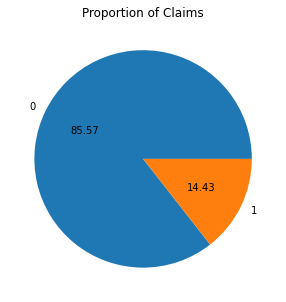

In [114]:
plt.figure(figsize = (5,5))
proportions = data.CLAIMED.value_counts(1)*100
labels = data.CLAIMED.value_counts(1).index
plt.pie(proportions,labels=labels,autopct="%.2f")
plt.title("Proportion of Claims")
plt.show()

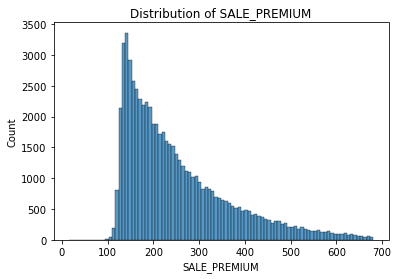

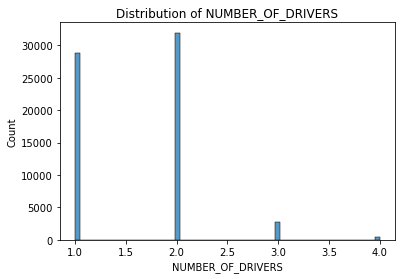

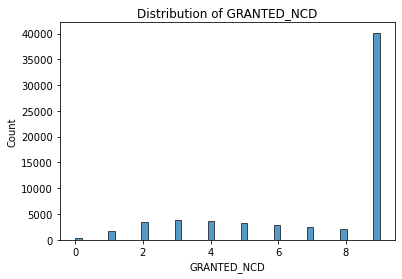

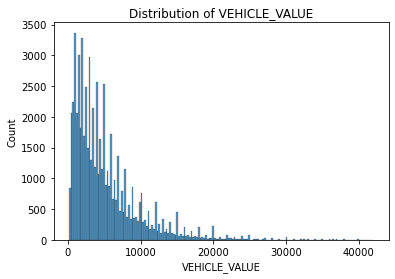

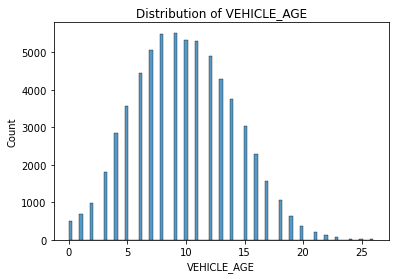

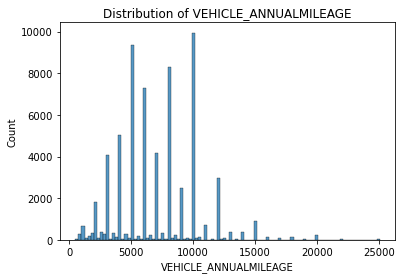

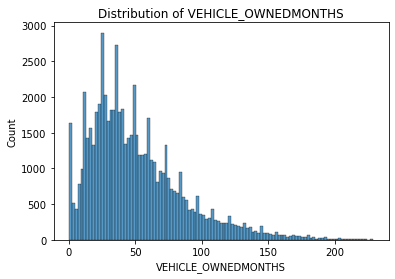

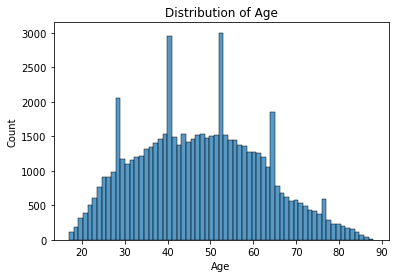

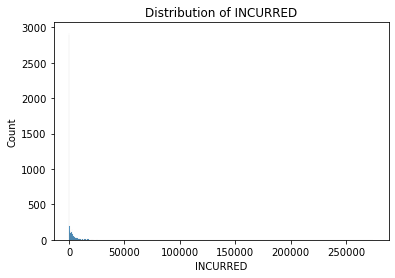

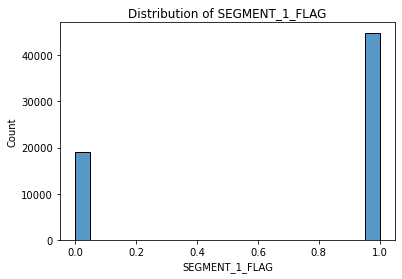

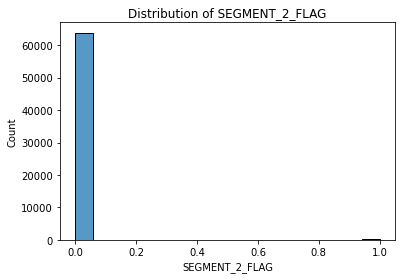

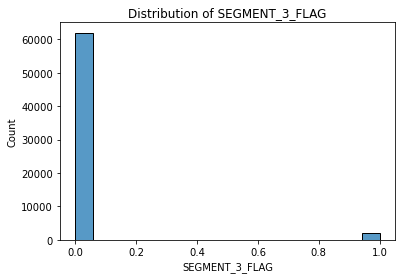

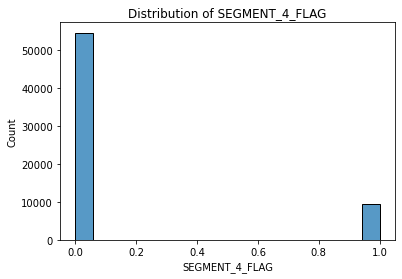

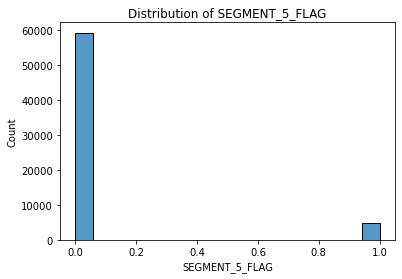

In [115]:
for i in num_data.columns:
    sns.histplot(num_data[i])
    plt.title(f"Distribution of {i}")
    plt.show()

<AxesSubplot:xlabel='VEHICLE_CLASSOFUSE', ylabel='count'>

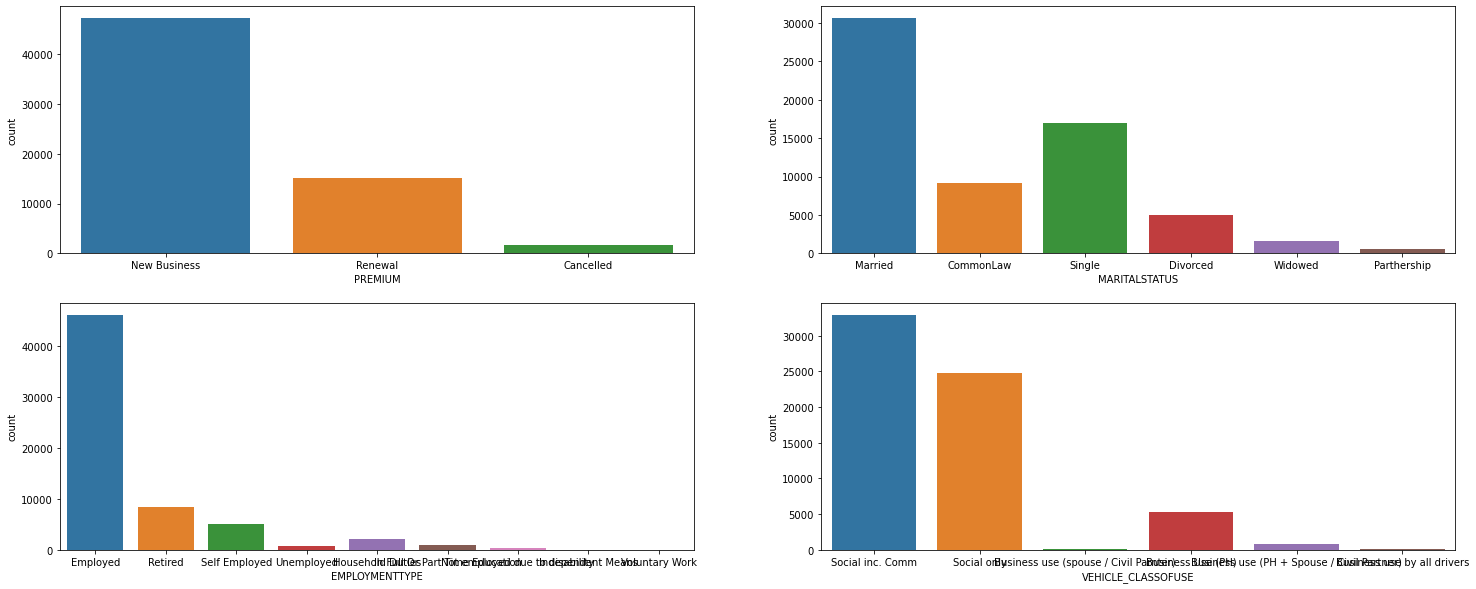

In [116]:
fig, ax = plt.subplots(2,2,figsize=(25,10))
sns.countplot(x=new_data.PREMIUM, ax=ax[0,0])
sns.countplot(x=new_data.MARITALSTATUS, ax=ax[0,1])
sns.countplot(x=new_data.EMPLOYMENTTYPE, ax=ax[1,0])
sns.countplot(x=new_data.VEHICLE_CLASSOFUSE, ax=ax[1,1])

Inferences:
    We have more numerical variables in our data as compared to categorical
    
    Numerical values:
    
        1. We can see that 'Incurred' is the most skewed among all, leading to very high value outliers.
        2. Segment_2_Flag is also quite skewed, because we have very few entries in Segment_2
        3. Vehicle Value, Vehicle Annual Mileage and Vehicel Owned Months look like slightly right skewed distributions. 
        4. Vehicle Value being rightly skewed, has most of the values less than 10k, and some high value outliers.
        5. Vehicle Age and Driver Age have a normal distribution, with some exceptionally high presence of drivers' age of around 30, 40, 50 and 65 years.
        6. 30-65 years is the most common age of drivers. 
        7. While most of the vehicles are around 5-15 years old at the time of policy purchase, most customers seem to be owning vehicles for around 2-5 years while purchasing policies.
        
    Categorical values:
        1. Policy status (Premium) have only 3 classes, with most of the entries belonging to 'New Business'
        2. Customer base consists mostly of married and single people, followed by some falling in 'Common Law' and 'Divorced' category. This seems to be fair distribution from real life point of view.
        3. Most of our customers are employed, with some of them being retired or self employed. Other categories don't seem to catch much traction.
        4. Majority of customers use their vehicles for social purposes as compared to business. 


# Bi-variate Analysis

In [117]:
data[data.CLAIMED==0].describe()

,SALE_PREMIUM,NUMBER_OF_DRIVERS,GRANTED_NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,Age,INCURRED,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG,CLAIMED,POLICIES
count,54796.000000,54796.000000,54796.000000,54796.000000,54796.000000,54796.000000,54796.000000,54796.000000,0.0,54796.000000,54796.000000,54796.000000,54796.000000,54796.000000,54796.0,54796.0
mean,249.807707,1.604314,7.234999,5089.921471,9.885735,6918.230996,51.524874,47.792704,NaN,0.700197,0.002975,0.033232,0.150522,0.076757,0.0,1.0
std,114.520587,0.607024,2.632204,4707.656711,4.309504,3222.768399,36.358621,14.611001,NaN,0.458176,0.054460,0.179244,0.357586,0.266209,0.0,0.0
min,15.504902,1.000000,0.000000,148.355921,0.000000,496.127325,0.000000,17.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,161.173735,1.000000,5.000000,1920.075989,7.000000,4980.487819,25.000000,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,215.693437,2.000000,9.000000,3780.457401,10.000000,6030.998661,43.000000,48.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,305.630448,2.000000,9.000000,6732.726527,13.000000,9028.648747,70.000000,58.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,680.671610,4.000000,9.000000,42010.674621,26.000000,25024.687350,229.000000,88.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


In [118]:
data[data.CLAIMED==1].describe()

,SALE_PREMIUM,NUMBER_OF_DRIVERS,GRANTED_NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,Age,INCURRED,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG,CLAIMED,POLICIES
count,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.00000,9244.0,9244.0
mean,263.985821,1.611965,7.278775,5632.623555,9.578646,7841.446527,49.176547,46.441205,2024.656789,0.705106,0.003029,0.025530,0.128949,0.06177,1.0,1.0
std,119.727174,0.583698,2.587568,5129.071897,4.223687,3528.459295,34.659937,14.239022,6911.417271,0.456020,0.054956,0.157737,0.335161,0.24075,0.0,0.0
min,89.469567,1.000000,0.000000,164.301905,0.000000,502.068550,0.000000,17.000000,-138.923543,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,1.0
25%,171.101567,1.000000,5.000000,2012.438144,7.000000,5011.501610,25.000000,35.000000,10.235642,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,1.0
50%,230.078659,2.000000,9.000000,4043.862453,9.000000,7987.698349,41.000000,46.000000,96.077782,1.000000,0.000000,0.000000,0.000000,0.00000,1.0,1.0
75%,327.451372,2.000000,9.000000,7493.643138,12.000000,9998.912141,65.000000,57.000000,1880.326769,1.000000,0.000000,0.000000,0.000000,0.00000,1.0,1.0
max,679.013755,4.000000,9.000000,41997.085122,26.000000,25023.188623,224.000000,87.000000,274467.264443,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0


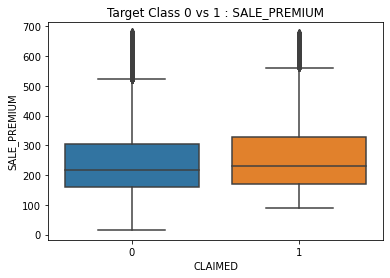

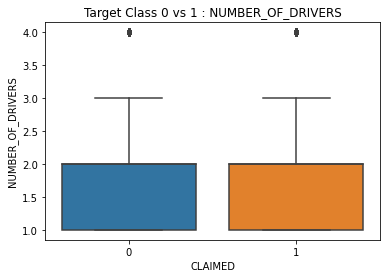

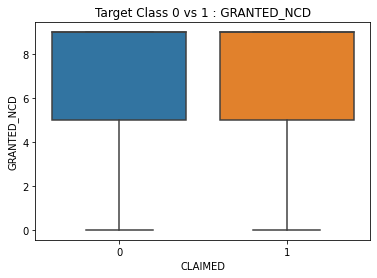

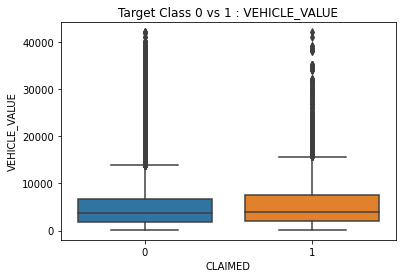

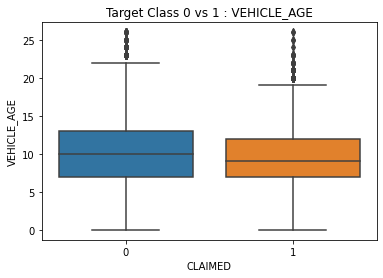

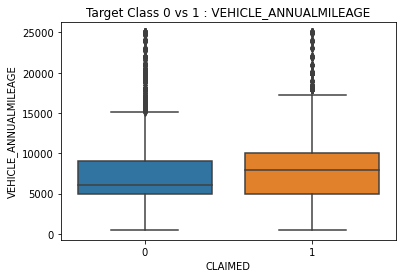

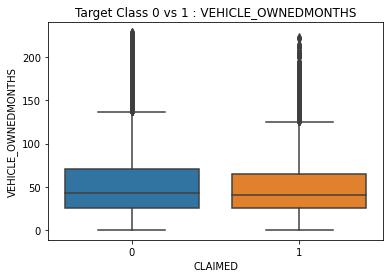

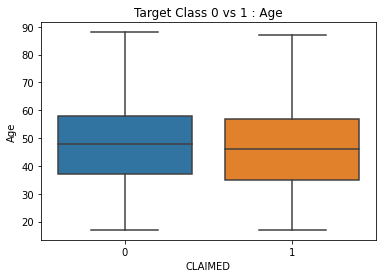

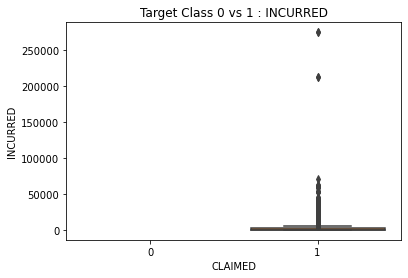

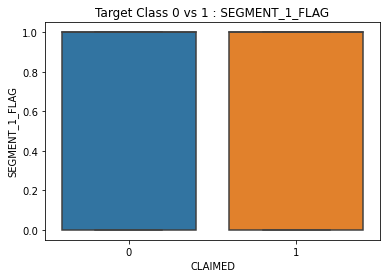

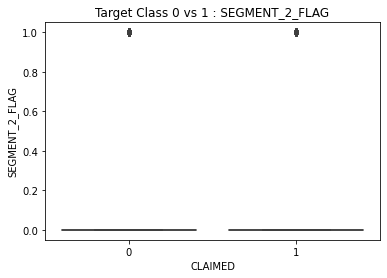

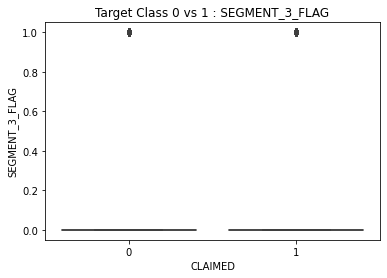

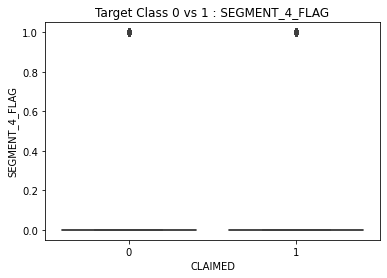

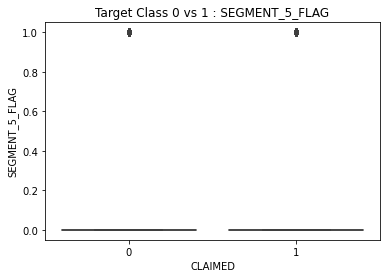

In [119]:
for i in num_data.columns:
    sns.boxplot(x=data.CLAIMED,y=data[i])
    plt.title(f"Target Class 0 vs 1 : {i}")
    plt.show()

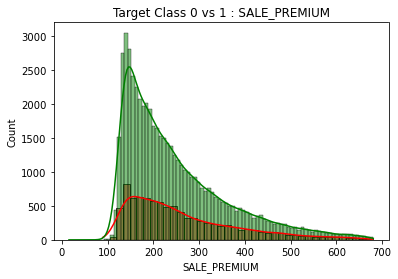

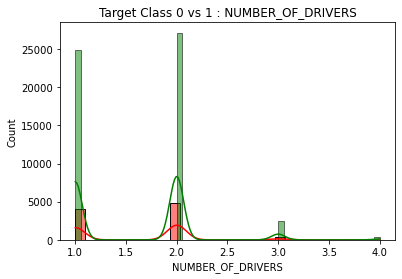

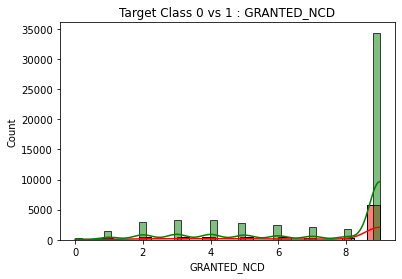

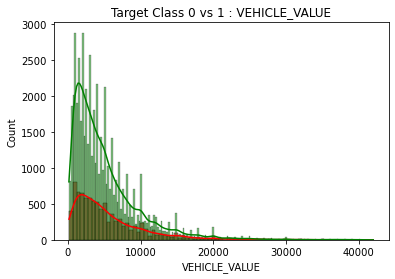

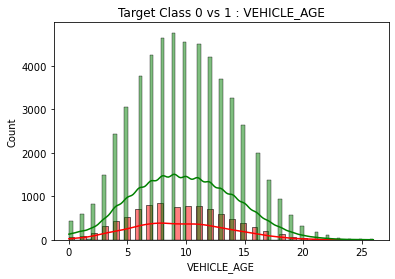

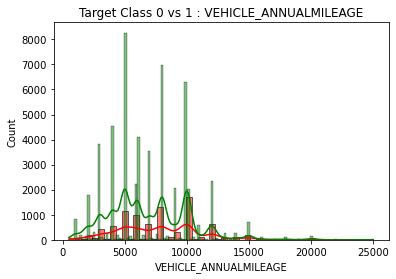

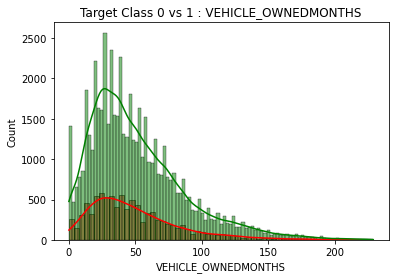

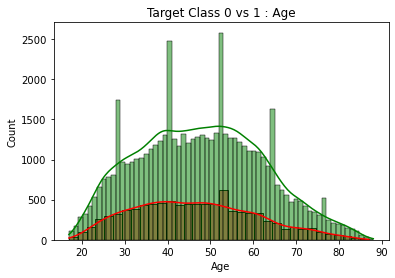

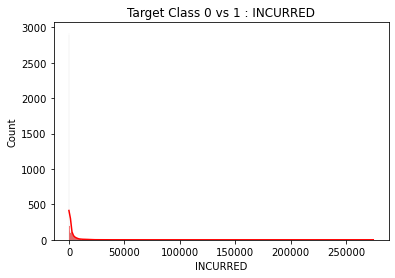

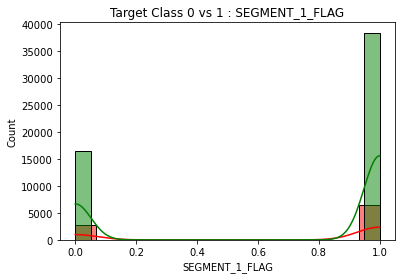

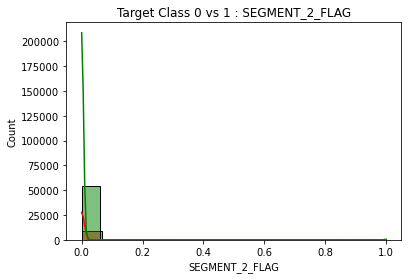

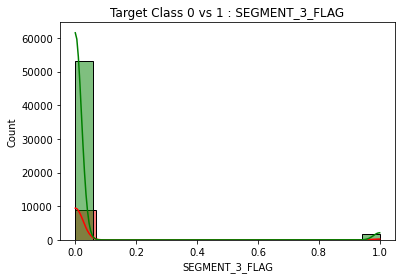

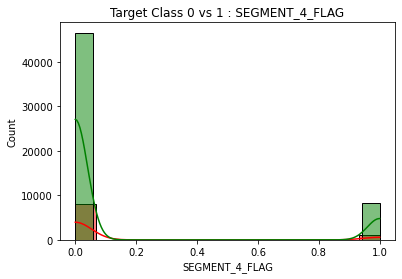

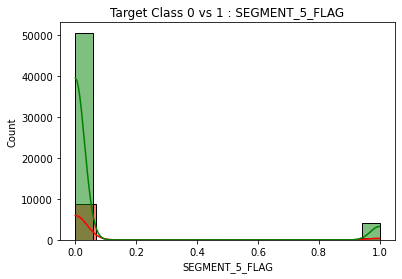

In [120]:
for i in num_data.columns:
    sns.histplot(data[data.CLAIMED==1][i], kde=True, color='Red')
    sns.histplot(data[data.CLAIMED==0][i], kde=True, color='Green')
    plt.title(f"Target Class 0 vs 1 : {i}")
    plt.show()

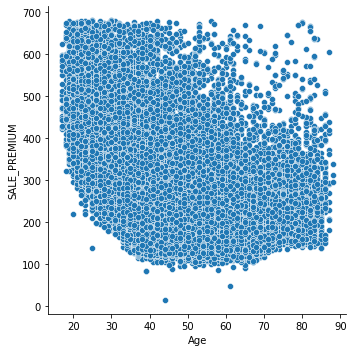

In [121]:
splot = sns.relplot(data = data, x = 'Age', y = 'SALE_PREMIUM', kind = 'scatter');

Text(0, 0.5, 'SALE_PREMIUM(Median)')

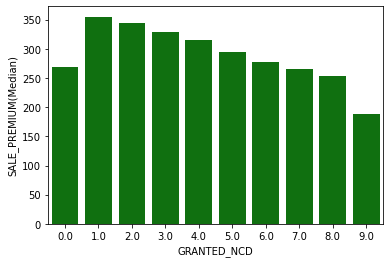

In [122]:
ncd = data.groupby('GRANTED_NCD')['SALE_PREMIUM'].median().reset_index()
p =sns.barplot(data = ncd, x ='GRANTED_NCD', y='SALE_PREMIUM', color='Green')
plt.ylabel('SALE_PREMIUM(Median)')

<AxesSubplot:xlabel='VEHICLE_CLASSOFUSE', ylabel='count'>

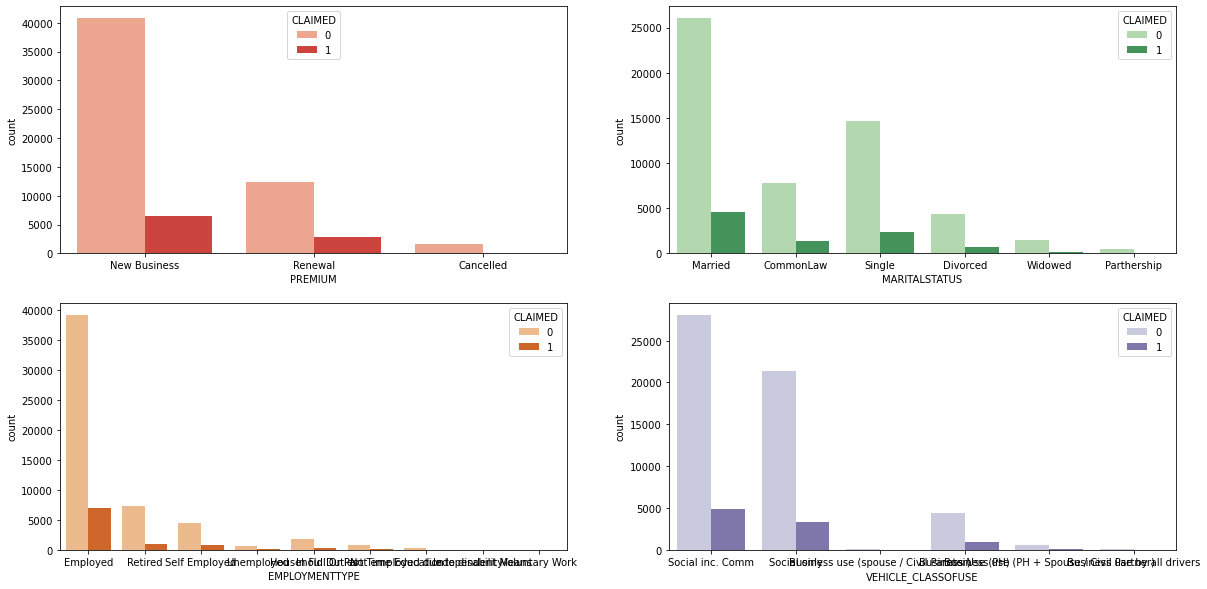

In [123]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot(x=data.PREMIUM, hue=data.CLAIMED, ax=ax[0,0], palette="Reds")
sns.countplot(x=data.MARITALSTATUS, hue=data.CLAIMED, ax=ax[0,1], palette="Greens")
sns.countplot(x=data.EMPLOYMENTTYPE, hue=data.CLAIMED, ax=ax[1,0], palette="Oranges")
sns.countplot(x=data.VEHICLE_CLASSOFUSE, hue=data.CLAIMED, ax=ax[1,1], palette="Purples")


In [124]:
data['Earning'] = data.EMPLOYMENTTYPE.apply( lambda x : 1 if x in ['Employed', 'Retired', 'Self Employed','Independent Means'] else 0)
data['With_Partner'] = data.MARITALSTATUS.apply( lambda x : 1 if x in ['Married', 'CommonLaw','Parthership'] else 0)
data['Vehicle_use_Business'] = data.VEHICLE_CLASSOFUSE.apply( lambda x : 0 if x in ['Social inc. Comm', 'Social only'] else 1)

<AxesSubplot:xlabel='Vehicle_use_Business', ylabel='count'>

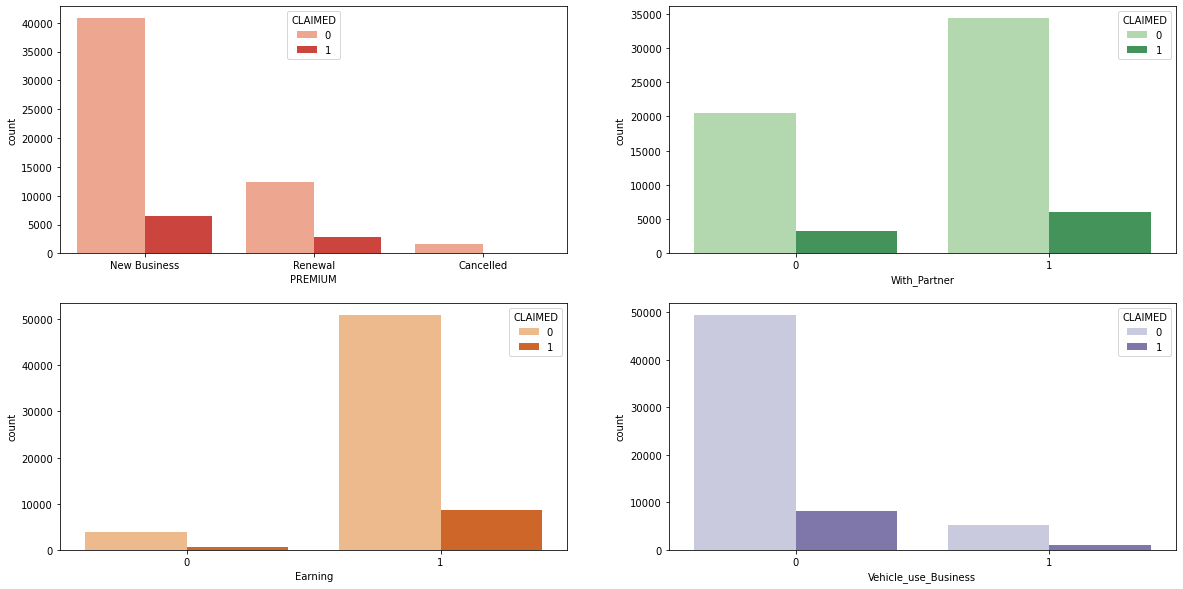

In [125]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot(x=data.PREMIUM, hue=data.CLAIMED, ax=ax[0,0], palette="Reds")
sns.countplot(x=data.With_Partner, hue=data.CLAIMED, ax=ax[0,1], palette="Greens")
sns.countplot(x=data.Earning, hue=data.CLAIMED, ax=ax[1,0], palette="Oranges")
sns.countplot(x=data.Vehicle_use_Business, hue=data.CLAIMED, ax=ax[1,1], palette="Purples")

Inferences from Bivariate Analysis:


 1. We can see that whether a policy is being claimed or not, is not very highly dependent on many factors. Although we do see a small relation between policy claimed and sale premium. Sale premium seems to slightly higher for the poliies which have been claimed.
 2. Customers in Segment 1 are the most common customers, and also the ones who claim most often. 
 3. Most of the claimed policies seem to have sale premium between $100 - $300
 4. Most policy holders buy policies for 1 or 2 drivers, with policies with 2 drivers having most claim frequency.
 5. Similarly for granted NCD, data is highly skewed towards NCD = 9.
 6. Majority of the claims are on vehicles with values upto $500-$600
 7. Distribution of claimed policies with Vehicle Age is also quite normal with mass between 5-15years
 8. Vehicles owned for about 2-4 years are the most common to meet an accident.
 9. Driver Age seems to have a similar distribution whether a policy is being claimed or not.
 10. Sale Premium is appearing to have a negative corelation with drivers’ age, with a smooth exponential type of curve. Sale premium seems to stabilise for drivers age > 45-50 years
 12. Sale premium also has a clear negative corelation with granted NCD, with an exception of NCD being 0. This is what we should expect as well. 
 13. Looking at our categorical variables, we can see that most of the customers are earning, drive for social use, live with a partner and buy new policies. 


# Multi-variate Analysis

<AxesSubplot:>

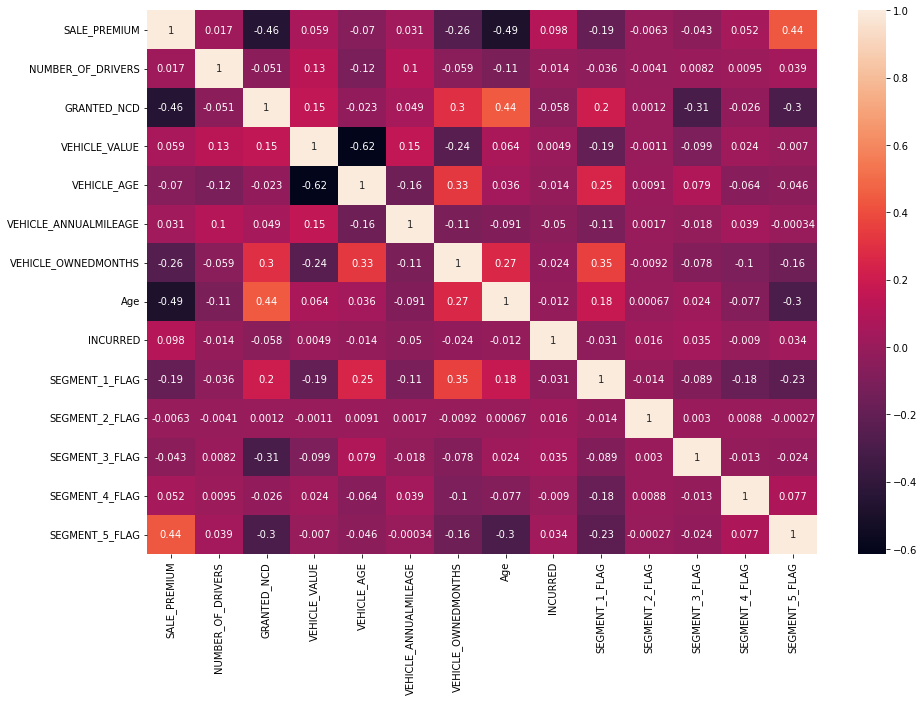

In [126]:
f,ax = plt.subplots(figsize=(15,10),facecolor='white')
#data = cleaned_data.drop('POLICY_NUMBER', axis=1)
sns.heatmap(num_data.corr(), annot = True)

In [127]:
bins = [0, 1, 2, np.inf]
names = ['1', '2', '2+']
data['DRIVERS_RANGE'] = pd.cut(data['NUMBER_OF_DRIVERS'], bins, labels=names)

bins = [0, 18, 30, 45, 60, 75, np.inf]
names = ['<18', '18-30', '30-45', '45-60', '60-75', '75+']
data['Age_Range'] = pd.cut(data['Age'], bins, labels=names)

bins = [0, 2000, 4000, 6000, 8000, 10000, np.inf]
names = ['<2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k', '10k+']
data['VEHICLE_VALUE_RANGE'] = pd.cut(data['VEHICLE_VALUE'], bins, labels=names)

bins = [0, 5, 10, 15, 20, np.inf]
names = ['<5', '5-10', '10-15', '15-20', '20+']
data['VEHICLE_AGE_RANGE'] = pd.cut(data['VEHICLE_AGE'], bins, labels=names)

bins = [0, 2000, 4000, 6000, 8000, 10000, np.inf]
names = ['<2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k', '10k+']
data['VEHICLE_ANNUAL_MILEAGE_RANGE'] = pd.cut(data['VEHICLE_ANNUALMILEAGE'], bins, labels=names)

bins = [0, 25, 50, 75, 100, np.inf]
names = ['<25', '25-50', '50-75', '75-100','100+']
data['VEHICLE_OWNEDMONTHS_RANGE'] = pd.cut(data['VEHICLE_OWNEDMONTHS'], bins, labels=names)


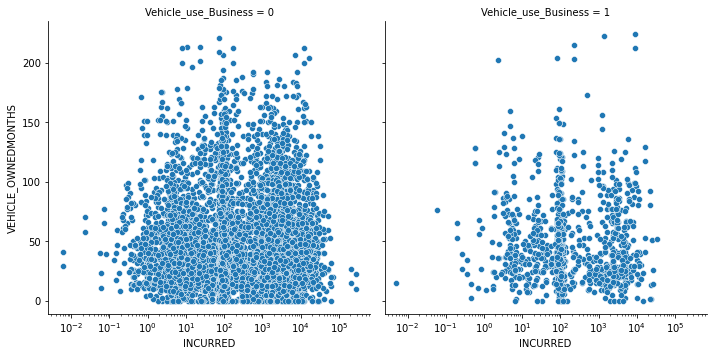

In [128]:
#plt.figure(figsize=(200, 50), dpi=80)
splot = sns.relplot(data = data, x = 'INCURRED', y = 'VEHICLE_OWNEDMONTHS', kind = 'scatter', col = 'Vehicle_use_Business');
splot.set(xscale='log')

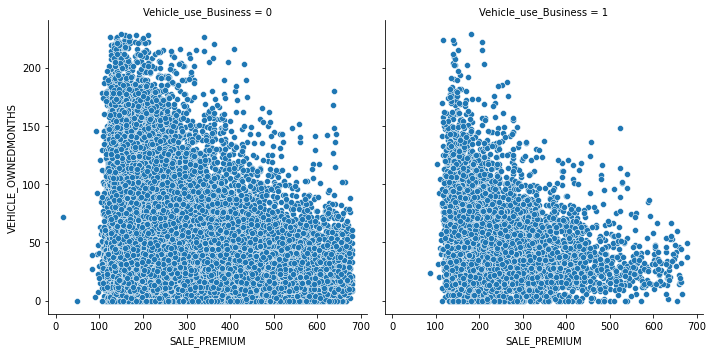

In [129]:
sns.relplot(data = data, x = 'SALE_PREMIUM', y = 'VEHICLE_OWNEDMONTHS', kind = 'scatter', col = 'Vehicle_use_Business');
#splot.set(xscale='log')

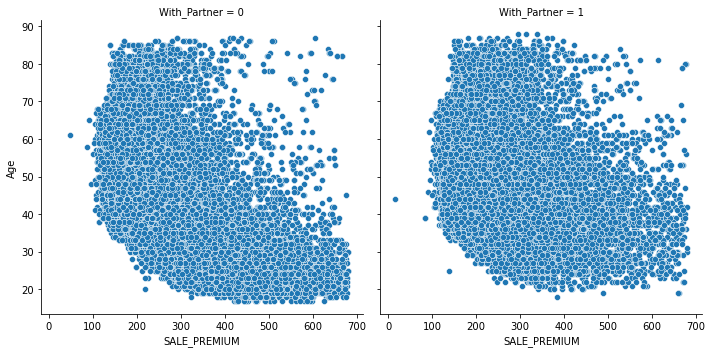

In [130]:
sns.relplot(data = data, x = 'SALE_PREMIUM', y = 'Age', kind = 'scatter', col = 'With_Partner');
#splot.set(xscale='log')

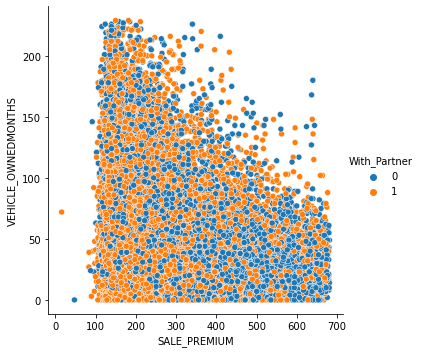

In [131]:
sns.relplot(data = data, x = 'SALE_PREMIUM', y = 'VEHICLE_OWNEDMONTHS', kind = 'scatter', hue = 'With_Partner');
#splot.set(xscale='log')

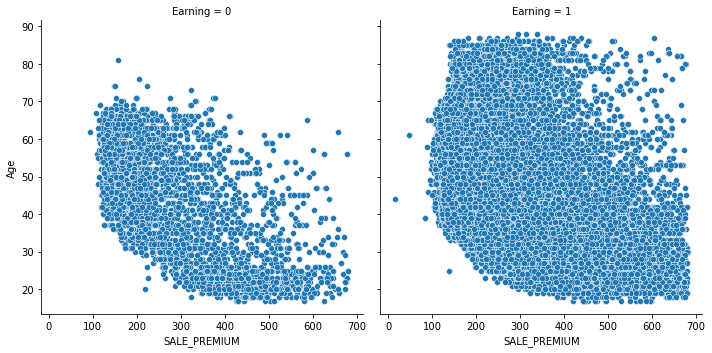

In [132]:
sns.relplot(data = data, x = 'SALE_PREMIUM', y = 'Age', kind = 'scatter', col = 'Earning');
#splot.set(xscale='log')

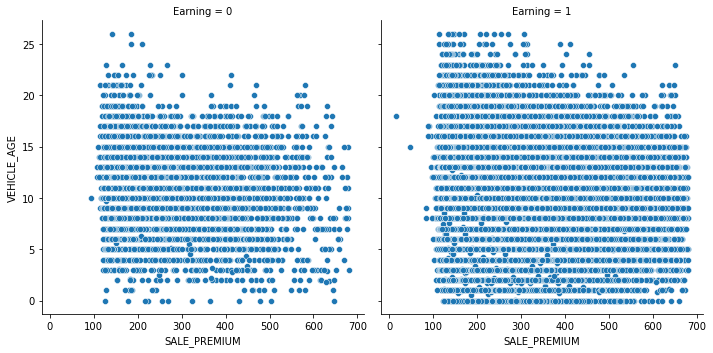

In [133]:
sns.relplot(data = data, x = 'SALE_PREMIUM', y = 'VEHICLE_AGE', kind = 'scatter', col = 'Earning');
#splot.set(xscale='log')

In [134]:
data['MARITALSTATUS_cat'] =data['MARITALSTATUS'].astype('category').cat.codes
data['EMPLOYMENTTYPE_cat'] =data['EMPLOYMENTTYPE'].astype('category').cat.codes
data['PREMIUM_cat'] =data['PREMIUM'].astype('category').cat.codes
data['VEHICLE_CLASSOFUSE_cat'] =data['VEHICLE_CLASSOFUSE'].astype('category').cat.codes

Inferences from Multivariate study:

 1. From the heat map study, we can see that there are a lot of correlations between our numerical values. 
 2. Sale premium has negative correlation with NCD, Driver Age, Vehicle Owned Months and Segment 1 Flag. 
 3. Whereas Sale Premium seems to have a positive correlation with Segment 5 Flag. This means customers  belonging to Segment 1 generally pay less premium, whereas customers of Segment 5 pay a higher premium.
 4. Incurred value also seems to be directly correlated (although slightly) with sale premium.
 5. Segment 1 flag has a negative correlation with Vehicle Value, while it has positive correlation with Vehicle Owned months. This shows that customers of Segment 1 own vehicles with lower values, but for longer duration.
 6. Vehicle Age is non-surprisingly positively related to Vehicle Owned Months, while negatively related to Vehicle Value.
 7. Granted NCD shows a positive correlatio with Drivers’ age and Vehicles owned months, which seem to suggest that more experienced drivers have made less claims historically. 
 8. Granted NCD depicts a negative relation with Segment 3 and Segment 5 Flag, showing that people in Segment 3 and Segment 5 claim less NCD.
 9. Vehicle Mileage is positively related with vehicles owned months and slighly with Vehicle Value. 
 10. From the scatter plot study, we can see that the customers are not easily (linearly) separable on any class (relationship, vehicle use, employment etc.)

<AxesSubplot:>

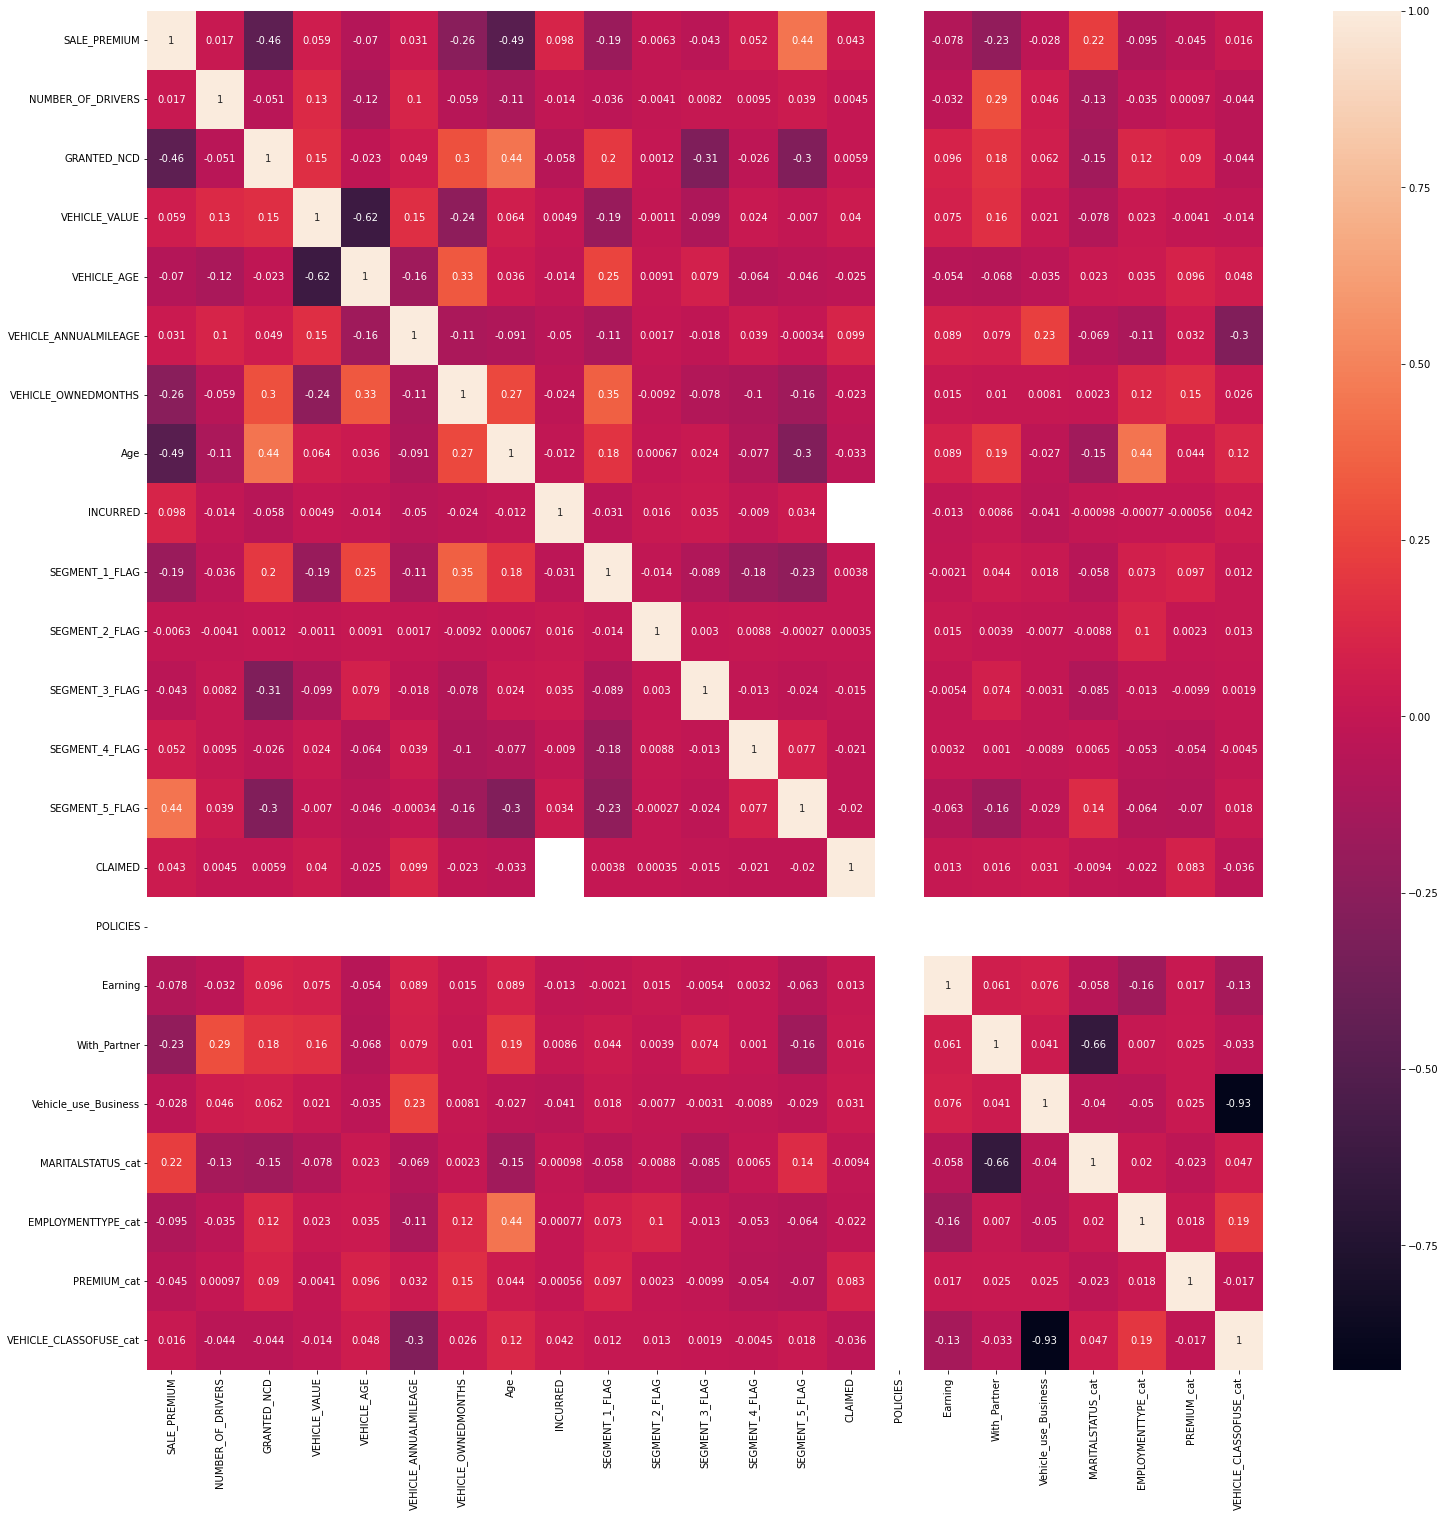

In [135]:
f,ax = plt.subplots(figsize=(25,25),facecolor='white')
#data = new_data.drop(['POLICY_NUMBER', 'POLICIES'], axis=1)
sns.heatmap(data.corr(), annot = True)

Factors driving Sale Premium and Claims:

Sale Premium:
 1. Segment seems to be the most influencing variable for the premium, with Segment 1 having the least premium and Segment 5 having the most. Correlation of Seg 5 Flag with Premium is as high as 0.44
 2. Marital Status looks like the second most prominent factor to drive Premium, with a correlation of 0.22
 3. Vehicle value shows a small correlation as well. Other factors play relatively smaller roles.
 4. Age and Granted NCD show a very high negative correlation with Premium charged. So these can also be considered as major factors driving amount of premium charged.
 5. Vehicle Owned months show a decent negative correlation of -0.26
 
Claims:
 1. Vehicle annual mileage seems to have the maximum impact on claims. Its correlation with Claims is ~0.1
 2. Other factors like Policy status (Premium), Sale Premium, Vehicle Value and Vehicle Class of Use also show some positive relationship

# Profitability study

In [136]:
def calculate_profitability(col_names):
    profitability = data.groupby(col_names).sum()[['POLICIES', 'SALE_PREMIUM', 'CLAIMED', 'INCURRED']]
    profitability['LOSS_RATIO'] = profitability.INCURRED/profitability.SALE_PREMIUM
    profitability['CLAIM_FREQ'] = profitability.CLAIMED/profitability.POLICIES
    return profitability

In [137]:
profitability_by_policystatus = calculate_profitability(['PREMIUM'])
profitability_by_marital_status = calculate_profitability(['MARITALSTATUS'])
profitability_by_ncd = calculate_profitability(['GRANTED_NCD'])
profitability_by_employment = calculate_profitability(['EMPLOYMENTTYPE'])
profitability_by_v_class = calculate_profitability(['VEHICLE_CLASSOFUSE'])
profitability_by_age = calculate_profitability(['Age_Range'])
profitability_by_drivers_num = calculate_profitability(['DRIVERS_RANGE'])
profitability_by_v_value = calculate_profitability(['VEHICLE_VALUE_RANGE'])
profitability_by_v_age = calculate_profitability(['VEHICLE_AGE_RANGE'])
profitability_by_v_mileage = calculate_profitability(['VEHICLE_ANNUAL_MILEAGE_RANGE'])
profitability_by_v_months = calculate_profitability(['VEHICLE_OWNEDMONTHS_RANGE'])
profitability_by_policystatus

,POLICIES,SALE_PREMIUM,CLAIMED,INCURRED,LOSS_RATIO,CLAIM_FREQ
PREMIUM,,,,,,
Cancelled,1648,4.505984e+05,0,0.000000e+00,0.000000,0.000000
New Business,47232,1.198121e+07,6419,1.301274e+07,1.086096,0.135904
Renewal,15160,3.696944e+06,2825,5.703191e+06,1.542677,0.186346


In [138]:
data['SEGMENT_OTHER_FLAG'] = data.apply(lambda x: 1 if (x.SEGMENT_1_FLAG + x.SEGMENT_2_FLAG +
       x.SEGMENT_3_FLAG + x.SEGMENT_4_FLAG + x.SEGMENT_5_FLAG) == 0 else 0, axis=1 )
profitability_by_segment_1 = calculate_profitability(['SEGMENT_1_FLAG']).drop(0.0)
profitability_by_segment_2 = calculate_profitability(['SEGMENT_2_FLAG']).drop(0.0)
profitability_by_segment_3 = calculate_profitability(['SEGMENT_3_FLAG']).drop(0.0)
profitability_by_segment_4 = calculate_profitability(['SEGMENT_4_FLAG']).drop(0.0)
profitability_by_segment_5 = calculate_profitability(['SEGMENT_5_FLAG']).drop(0.0)
profitability_by_segment_o = calculate_profitability(['SEGMENT_OTHER_FLAG']).drop(0.0)

In [139]:
profitability_by_segments = pd.concat([profitability_by_segment_1, profitability_by_segment_2,
                                       profitability_by_segment_3, profitability_by_segment_4,
                                       profitability_by_segment_5, profitability_by_segment_o], 
                            keys=['Segment_1', 'Segment_2', 'Segment_3', 
                                  'Segment_4','Segment_5','Segment_other'])

profitability_by_segments = profitability_by_segments.reset_index('SEGMENT_1_FLAG')
profitability_by_segments = profitability_by_segments.drop('SEGMENT_1_FLAG', axis=1)
profitability_by_segments.sort_values('LOSS_RATIO', ascending=False)


,POLICIES,SALE_PREMIUM,CLAIMED,INCURRED,LOSS_RATIO,CLAIM_FREQ
Segment_2,191,4.554589e+04,28,1.123369e+05,2.466455,0.146597
Segment_3,2057,4.624341e+05,236,8.258938e+05,1.785971,0.114730
Segment_other,11122,2.833782e+06,1721,3.380462e+06,1.192915,0.154738
Segment_1,44886,1.066701e+07,6518,1.228734e+07,1.151901,0.145212
Segment_4,9440,2.514589e+06,1192,2.220915e+06,0.883212,0.126271
Segment_5,4777,2.053703e+06,571,1.672571e+06,0.814417,0.119531


In [140]:
univariate_profitability = pd.concat([profitability_by_age,profitability_by_policystatus,
                    profitability_by_drivers_num, profitability_by_marital_status,
                    profitability_by_ncd, profitability_by_employment,
                    profitability_by_v_class, profitability_by_v_value,
                    profitability_by_v_age, profitability_by_v_mileage,
                    profitability_by_v_months, profitability_by_segments], 
                    keys=['Age','Policy_Status', 'Drivers', 'Marital_Status', 'NCD', 
                          'Employment', 'Vehicle_Class', 'Vehicle_Value', 'Vehicle_Age', 
                          'Mileage', 'Vehicle_Months', 'Segments'])
univariate_profitability

POLICIES  SALE_PREMIUM  CLAIMED      INCURRED  \
Age      <18                 114  5.686085e+04       10  1.899993e+04   
         18-30              8789  3.481682e+06     1356  3.468832e+06   
         30-45             20516  5.531164e+06     3242  6.518286e+06   
         45-60             21702  4.412360e+06     2996  5.242018e+06   
         60-75             10819  2.124885e+06     1397  2.861673e+06   
...                          ...           ...      ...           ...   
Segments Segment_2           191  4.554589e+04       28  1.123369e+05   
         Segment_3          2057  4.624341e+05      236  8.258938e+05   
         Segment_4          9440  2.514589e+06     1192  2.220915e+06   
         Segment_5          4777  2.053703e+06      571  1.672571e+06   
         Segment_other     11122  2.833782e+06     1721  3.380462e+06   

                        LOSS_RATIO  CLAIM_FREQ  
Age      <18              0.334148    0.087719  
         18-30            0.996309    0.154284  
         30-45            1.178465    0.158023  
         45-60            1.188030    0.138052  
         60-75            1.346742    0.129125  
...                            ...         ...  
Segments Segment_2        2.466455    0.146597  
         Segment_3        1.785971    0.114730  
         Segment_4        0.883212    0.126271  
         Segment_5        0.814417    0.119531  
         Segment_other    1.192915    0.154738  

[71 rows x 6 columns]

In [141]:
Loss_ratio_uni = univariate_profitability.sort_values('LOSS_RATIO', ascending=False)
Loss_ratio_uni.head()

POLICIES  SALE_PREMIUM  CLAIMED      INCURRED  \
Segments      Segment_2              191  4.554589e+04       28  1.123369e+05   
              Segment_3             2057  4.624341e+05      236  8.258938e+05   
Policy_Status Renewal              15160  3.696944e+06     2825  5.703191e+06   
Employment    Household Duties      2094  4.923036e+05      254  6.835625e+05   
Vehicle_Value 10k+                  8125  2.166684e+06     1411  2.999540e+06   

                                LOSS_RATIO  CLAIM_FREQ  
Segments      Segment_2           2.466455    0.146597  
              Segment_3           1.785971    0.114730  
Policy_Status Renewal             1.542677    0.186346  
Employment    Household Duties    1.388498    0.121299  
Vehicle_Value 10k+                1.384392    0.173662

In [142]:
Loss_ratio_uni.tail()

POLICIES   SALE_PREMIUM  \
Vehicle_Class Business use (spouse / Civil Parnter)       124   28047.899413   
Age           <18                                         114   56860.850949   
Employment    Independent Means                            55   11395.827141   
              Voluntary Work                               12    2956.106092   
Policy_Status Cancelled                                  1648  450598.433217   

                                                     CLAIMED      INCURRED  \
Vehicle_Class Business use (spouse / Civil Parnter)       21  12206.928843   
Age           <18                                         10  18999.933661   
Employment    Independent Means                            7   2465.189553   
              Voluntary Work                               1    153.474543   
Policy_Status Cancelled                                    0      0.000000   

                                                     LOSS_RATIO  CLAIM_FREQ  
Vehicle_Class Business use (spouse / Civil Parnter)    0.435217    0.169355  
Age           <18                                      0.334148    0.087719  
Employment    Independent Means                        0.216324    0.127273  
              Voluntary Work                           0.051918    0.083333  
Policy_Status Cancelled                                0.000000    0.000000

In [143]:
Claim_freq_uni = univariate_profitability.sort_values('CLAIM_FREQ', ascending=False)
Claim_freq_uni.head()

,,POLICIES,SALE_PREMIUM,CLAIMED,INCURRED,LOSS_RATIO,CLAIM_FREQ
Mileage,10k+,11677,2.951676e+06,2260,3.679183e+06,1.246472,0.193543
Policy_Status,Renewal,15160,3.696944e+06,2825,5.703191e+06,1.542677,0.186346
Vehicle_Class,Business Use (PH),5325,1.308273e+06,958,1.270596e+06,0.971201,0.179906
Vehicle_Value,10k+,8125,2.166684e+06,1411,2.999540e+06,1.384392,0.173662
Vehicle_Class,Business use (spouse / Civil Parnter),124,2.804790e+04,21,1.220693e+04,0.435217,0.169355


In [144]:
Claim_freq_uni.tail()

POLICIES  SALE_PREMIUM  CLAIMED      INCURRED  \
Mileage       2k-4k               8899  2.161686e+06      930  2.544469e+06   
              <2k                 2386  5.735762e+05      217  4.647149e+05   
Age           <18                  114  5.686085e+04       10  1.899993e+04   
Employment    Voluntary Work        12  2.956106e+03        1  1.534745e+02   
Policy_Status Cancelled           1648  4.505984e+05        0  0.000000e+00   

                              LOSS_RATIO  CLAIM_FREQ  
Mileage       2k-4k             1.177076    0.104506  
              <2k               0.810206    0.090947  
Age           <18               0.334148    0.087719  
Employment    Voluntary Work    0.051918    0.083333  
Policy_Status Cancelled         0.000000    0.000000

In [145]:
profitability_by_Age_NCD = calculate_profitability(['Age_Range', 'GRANTED_NCD'])
profitability_by_Age_NCD = profitability_by_Age_NCD[profitability_by_Age_NCD.LOSS_RATIO == profitability_by_Age_NCD.LOSS_RATIO]
Claim_freq_Age_NCD = profitability_by_Age_NCD.sort_values('CLAIM_FREQ', ascending=False)
Loss_ratio_Age_NCD = profitability_by_Age_NCD.sort_values('LOSS_RATIO', ascending=False)

In [146]:
Claim_freq_Age_NCD.head()

POLICIES   SALE_PREMIUM  CLAIMED       INCURRED  \
Age_Range GRANTED_NCD                                                    
75+       5.0                18    5419.877510        6   12906.516598   
          8.0                20    5542.537181        6    4607.681662   
          4.0                21    6322.547898        6    6846.075665   
18-30     9.0               858  266043.050492      172  334700.173867   
75+       3.0                10    3436.375961        2    3665.679998   

                       LOSS_RATIO  CLAIM_FREQ  
Age_Range GRANTED_NCD                          
75+       5.0            2.381330    0.333333  
          8.0            0.831331    0.300000  
          4.0            1.082803    0.285714  
18-30     9.0            1.258068    0.200466  
75+       3.0            1.066728    0.200000

In [147]:
Claim_freq_Age_NCD.tail()

POLICIES  SALE_PREMIUM  CLAIMED  INCURRED  LOSS_RATIO  \
Age_Range GRANTED_NCD                                                          
75+       1.0                 4   1070.133491        0       0.0         0.0   
<18       1.0                18   9505.143997        0       0.0         0.0   
75+       6.0                18   4430.508765        0       0.0         0.0   
<18       4.0                 2    990.708090        0       0.0         0.0   
          0.0                 3   1454.454513        0       0.0         0.0   

                       CLAIM_FREQ  
Age_Range GRANTED_NCD              
75+       1.0                 0.0  
<18       1.0                 0.0  
75+       6.0                 0.0  
<18       4.0                 0.0  
          0.0                 0.0

In [148]:
Loss_ratio_Age_NCD.head()

POLICIES   SALE_PREMIUM  CLAIMED       INCURRED  \
Age_Range GRANTED_NCD                                                    
60-75     4.0               201   42705.746117       27  131070.956519   
          5.0               222   47747.470781       36  113916.029567   
75+       5.0                18    5419.877510        6   12906.516598   
45-60     5.0               650  151824.841764       81  361207.163342   
          4.0               684  164182.137276       90  343460.749595   

                       LOSS_RATIO  CLAIM_FREQ  
Age_Range GRANTED_NCD                          
60-75     4.0            3.069164    0.134328  
          5.0            2.385802    0.162162  
75+       5.0            2.381330    0.333333  
45-60     5.0            2.379104    0.124615  
          4.0            2.091950    0.131579

In [149]:
Loss_ratio_Age_NCD.tail()

POLICIES  SALE_PREMIUM  CLAIMED  INCURRED  LOSS_RATIO  \
Age_Range GRANTED_NCD                                                          
75+       0.0                 4   1387.763805        0       0.0         0.0   
          1.0                 4   1070.133491        0       0.0         0.0   
<18       1.0                18   9505.143997        0       0.0         0.0   
75+       6.0                18   4430.508765        0       0.0         0.0   
<18       0.0                 3   1454.454513        0       0.0         0.0   

                       CLAIM_FREQ  
Age_Range GRANTED_NCD              
75+       0.0                 0.0  
          1.0                 0.0  
<18       1.0                 0.0  
75+       6.0                 0.0  
<18       0.0                 0.0

In [150]:
def calculate_profitability_segments(seg, col_names):
    profitability = data[ data[seg] == 1.0 ]
    profitability = profitability.groupby(col_names).sum()[['POLICIES', 'SALE_PREMIUM', 'CLAIMED', 'INCURRED']]
    profitability['LOSS_RATIO'] = profitability.INCURRED/profitability.SALE_PREMIUM
    profitability['CLAIM_FREQ'] = profitability.CLAIMED/profitability.POLICIES
    return profitability

In [151]:
profitability_by_VM_Seg1 = calculate_profitability_segments('SEGMENT_1_FLAG', ['VEHICLE_OWNEDMONTHS_RANGE'])
profitability_by_VM_Seg2 = calculate_profitability_segments('SEGMENT_2_FLAG', ['VEHICLE_OWNEDMONTHS_RANGE'])
profitability_by_VM_Seg3 = calculate_profitability_segments('SEGMENT_3_FLAG', ['VEHICLE_OWNEDMONTHS_RANGE'])
profitability_by_VM_Seg4 = calculate_profitability_segments('SEGMENT_4_FLAG', ['VEHICLE_OWNEDMONTHS_RANGE'])
profitability_by_VM_Seg5 = calculate_profitability_segments('SEGMENT_5_FLAG', ['VEHICLE_OWNEDMONTHS_RANGE'])
profitability_by_VM_SegO = calculate_profitability_segments('SEGMENT_OTHER_FLAG', ['VEHICLE_OWNEDMONTHS_RANGE'])

profitability_by_NCD_Seg1 = calculate_profitability_segments('SEGMENT_1_FLAG', ['GRANTED_NCD'])
profitability_by_NCD_Seg2 = calculate_profitability_segments('SEGMENT_2_FLAG', ['GRANTED_NCD'])
profitability_by_NCD_Seg3 = calculate_profitability_segments('SEGMENT_3_FLAG', ['GRANTED_NCD'])
profitability_by_NCD_Seg4 = calculate_profitability_segments('SEGMENT_4_FLAG', ['GRANTED_NCD'])
profitability_by_NCD_Seg5 = calculate_profitability_segments('SEGMENT_5_FLAG', ['GRANTED_NCD'])
profitability_by_NCD_SegO = calculate_profitability_segments('SEGMENT_OTHER_FLAG', ['GRANTED_NCD'])

In [152]:
keys=['Segment_1', 'Segment_2', 'Segment_3','Segment_4','Segment_5','Segment_other']
profitability_by_segments_VM = pd.concat([profitability_by_VM_Seg1, profitability_by_VM_Seg2,
                                       profitability_by_VM_Seg3, profitability_by_VM_Seg4,
                                       profitability_by_VM_Seg5, profitability_by_VM_SegO], 
                            keys= keys)


profitability_by_segments_NCD = pd.concat([ profitability_by_NCD_Seg1,
                                            profitability_by_NCD_Seg2,
                                            profitability_by_NCD_Seg3,
                                            profitability_by_NCD_Seg4,
                                            profitability_by_NCD_Seg5,
                                            profitability_by_NCD_SegO],
                                         keys = keys)
profitability_by_segments_multi = pd.concat([ profitability_by_segments_VM,
                                            profitability_by_segments_NCD],
                                         keys = ['Vehicle Months', 'NCD'])
Loss_ratio_segments_multi =profitability_by_segments_multi.sort_values('LOSS_RATIO', ascending=False)
Claim_freq_segments_multi =profitability_by_segments_multi.sort_values('CLAIM_FREQ', ascending=False)
Loss_ratio_segments_multi.head()

POLICIES  SALE_PREMIUM  CLAIMED       INCURRED  \
NCD            Segment_3 5.0        88  19519.835950       11  234892.380998   
Vehicle Months Segment_2 <25        56  14017.868315        9   83198.944791   
NCD            Segment_2 9.0       124  24110.423708       15   99283.254482   
               Segment_3 4.0       357  81703.484085       37  286058.743901   
                         8.0         7   1265.870635        1    4070.569410   

                              LOSS_RATIO  CLAIM_FREQ  
NCD            Segment_3 5.0   12.033522    0.125000  
Vehicle Months Segment_2 <25    5.935207    0.160714  
NCD            Segment_2 9.0    4.117856    0.120968  
               Segment_3 4.0    3.501182    0.103641  
                         8.0    3.215628    0.142857

In [153]:
Loss_ratio_segments_multi.tail()

POLICIES  SALE_PREMIUM  CLAIMED     INCURRED  LOSS_RATIO  \
NCD Segment_2 7.0         6   2077.445646        2   124.496127    0.059928   
    Segment_5 0.0        59  25788.870712        4  1351.849062    0.052420   
    Segment_2 3.0         6   1887.560600        1    91.185151    0.048308   
              6.0         9   2792.509009        1    78.812009    0.028223   
              4.0        12   3371.297819        1    92.585785    0.027463   

                   CLAIM_FREQ  
NCD Segment_2 7.0    0.333333  
    Segment_5 0.0    0.067797  
    Segment_2 3.0    0.166667  
              6.0    0.111111  
              4.0    0.083333

In [154]:
Claim_freq_segments_multi.head()

POLICIES  SALE_PREMIUM  CLAIMED     INCURRED  \
NCD            Segment_2 7.0            6   2077.445646        2   124.496127   
                         2.0           10   3327.668015        3  3301.491752   
                         8.0            4   1326.709482        1    91.965506   
Vehicle Months Segment_2 75-100         8   1977.529834        2  1122.457194   
NCD            Segment_2 1.0            9   2992.198630        2  9017.353333   

                                 LOSS_RATIO  CLAIM_FREQ  
NCD            Segment_2 7.0       0.059928    0.333333  
                         2.0       0.992134    0.300000  
                         8.0       0.069318    0.250000  
Vehicle Months Segment_2 75-100    0.567606    0.250000  
NCD            Segment_2 1.0       3.013621    0.222222

In [155]:
Claim_freq_segments_multi.tail()

POLICIES  SALE_PREMIUM  CLAIMED      INCURRED  \
Vehicle Months Segment_2 50-75        36   7759.585448        3  19347.427980   
NCD            Segment_3 9.0          65  12111.727170        5   7160.724042   
Vehicle Months Segment_3 100+         87  16979.276629        6  24687.151531   
NCD            Segment_5 0.0          59  25788.870712        4   1351.849062   
               Segment_3 7.0          15   3240.926402        1   4070.569410   

                                LOSS_RATIO  CLAIM_FREQ  
Vehicle Months Segment_2 50-75    2.493358    0.083333  
NCD            Segment_3 9.0      0.591222    0.076923  
Vehicle Months Segment_3 100+     1.453958    0.068966  
NCD            Segment_5 0.0      0.052420    0.067797  
               Segment_3 7.0      1.255989    0.066667

Inferences on Profitbaility

Univariate:
 1. Customers in Segment 2 appear to be least profitable with a loss ratio of 2.46 on 28 claimed policies out of 191 policies. Similarly customers in Segment 5 seem to be most profitable with a loss ratio of 0.81 on 571 claimed policies out of 4777.
 2. On the other hand, if we compare the claim frequency, we see that customers driving vehicles for 10k+ miles every year during policy year have the highest claim frequency of 0.1935 and a loss ratio of 1.24. 
 3. All the policies which are cancelled, don’t have any incurred amounts. So if we leave them, we see customers doing voluntary work to be the most profitable class of customers. They only show a loss ratio of  0.05 with only 1 out of 12 policies claimed.

Bivariate:

 1. Since we have seen a decent correlation between Age and Granted NCD, we combine them to study their effect on profitability.
 2. With these two factors combined, we see that customers with age more than 75 years and who have claimed NCD for 5 years show the maximum claim frequency of 0.333 and a loss ratio of 2.38
 3. But if we compare the loss ratio, we see that customers in the range group 60-75 years with NCD of 4 years stand out with a huge loss ratio of >3. 

Multivariate:
 1. Segment is a target class, which shows correlation with many factors. So we do a trivariate analysis on the loss ratio along with Vehicle Owned Months and Granted NCD. 
 2. Customers in Segment 3 with NCD being 5 years are the least profitable. They show a loss ratio of >12 on 11 claimed policies out of 88.
 3. Similarly customers in Segment 2 with NCD as 4 years, seem to be the most profitable customers with a loss ratio of only 0.02
 4. Whereas if we go by claim frequency, Segment 2 people with NCD as 7 years claim insurance the most.
 5. Customers of Segment 3 with NCD 7 claim insurance the least